In [816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import itertools
import requests
import mysql.connector
import config
from bs4 import BeautifulSoup 
import json
from functools import reduce
from pandas import DataFrame
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 310)


# Data import/Manipulation from CSV file

In [452]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", usecols=['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales','Critic_Score', 'User_Score','User_Count','Developer','Rating'])
# 
# dropping all null values
data.dropna(inplace = True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 180 to 16141
Data columns (total 15 columns):
Name               6644 non-null object
Platform           6644 non-null object
Year_of_Release    6644 non-null float64
Genre              6644 non-null object
Publisher          6644 non-null object
NA_Sales           6644 non-null float64
EU_Sales           6644 non-null float64
JP_Sales           6644 non-null float64
Other_Sales        6644 non-null float64
Global_Sales       6644 non-null float64
Critic_Score       6644 non-null float64
User_Score         6644 non-null object
User_Count         6644 non-null float64
Developer          6644 non-null object
Rating             6644 non-null object
dtypes: float64(8), object(7)
memory usage: 830.5+ KB


In [496]:
# copy dataframe to new DF, and converting FLOAT's to INT's
data_le = data.copy()

# makes Year_of_Release into INT it was a FLOAT and manually scaling 
data_le['Year_of_Release']=data_le['Year_of_Release'].astype(int)
data_le['Critic_Score']=data_le['Critic_Score'].astype(int)
data_le['User_Count']=data_le['User_Count'].astype(float)
data_le['User_Score']=data_le['User_Score'].astype(float) * 10
data_le['NA_Sales']=data_le['NA_Sales'].astype(float)
data_le['EU_Sales']=data_le['EU_Sales'].astype(float)
data_le['JP_Sales']=data_le['JP_Sales'].astype(float)
data_le['Other_Sales']=data_le['Other_Sales'].astype(float)
data_le['Global_Sales']=data_le['Global_Sales'].astype(float)

data_le_nums = data_le.drop(columns=['Name','Platform','Genre','Publisher', 'Developer', 'Rating'])

data_le = data_le.sort_values(by=['Name'])

data_original=data_le.copy()


In [497]:
data_original.head()

Name Platform  Year_of_Release         Genre  \
180       Monster Hunter Stories      3DS             2017        Action   
181  The Elder Scrolls V: Skyrim      PS4             2016  Role-Playing   
182      Rise of the Tomb Raider      PS4             2016     Adventure   
183             MLB 16: The Show      PS4             2016        Action   
184                  Doom (2016)     XOne             2016       Shooter   

                       Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
180                       Capcom      0.00      0.00      0.28         0.00   
181           Bethesda Softworks      0.48      0.59      0.04         0.21   
182                  Square Enix      0.23      0.53      0.04         0.14   
183  Sony Computer Entertainment      0.72      0.00      0.00         0.17   
184           Bethesda Softworks      0.44      0.25      0.00         0.07   

     Global_Sales  Critic_Score  User_Score  User_Count  \
180          0.28            79        82.0        91.0   
181          1.33            81        71.0       624.0   
182          0.94            88        81.0      1082.0   
183          0.89            85        73.0       182.0   
184          0.76            87        84.0       679.0   

                             Developer Rating  
180                             Capcom   E10+  
181              Bethesda Game Studios      M  
182  Crystal Dynamics, Nixxes Software      M  
183             SCEA San Diego Studios      E  
184                        id Software      M

# Merging all console types per game into one row

In [498]:
df = data_le.groupby(['Name']).agg({'Platform': ','.join},{'Genre': ','.join},{'Developer': ','.join})
df.head()
# data_name = data_le.groupby('Name')['Platform'].apply(',' .join).reset_index()


Platform
Name                                                  
.hack//Infection Part 1                            PS2
.hack//Mutation Part 2                             PS2
.hack//Outbreak Part 3                             PS2
007 Racing                                          PS
007: Quantum of Solace                 Wii,X360,PS3,PC
007: The World is not Enough                        PS
1 vs. 100                                           DS
1701 A.D.                                           PC
18 Wheeler: American Pro Trucker                GC,PS2
18 Wheels of Steel: Extreme Trucker                 PC
187: Ride or Die                                XB,PS2
2002 FIFA World Cup                          XB,GC,PS2
2010 FIFA World Cup South Africa      X360,PS3,PSP,Wii
2014 FIFA World Cup Brazil                    X360,PS3
24: The Game                                       PS2
25 to Life                                      XB,PS2
300: March to Glory                                PSP
3D Dot Game Heroes                                 PS3
4x4 EVO 2                                           XB
50 Cent: Blood on the Sand                    PS3,X360
50 Cent: Bulletproof                            PS2,XB
7 Wonders of the Ancient World                      DS
7th Dragon III Code: VFD                           3DS
A Boy and His Blob                                 Wii
A Vampyre Story                                     PC
A Witch's Tale                                      DS
AC/DC LIVE: Rock Band Track Pack              PS3,X360
AMF Bowling 2004                                    XB
AMF Xtreme Bowling                                 PS2
APB Reloaded                                        PC
...                                                ...
Zero Escape: Virtue's Last Reward                  3DS
Zoids Assault                                     X360
ZombiU                                            WiiU
Zone of the Enders                                 PS2
Zone of the Enders HD Collection              X360,PS3
Zone of the Enders: The 2nd Runner                 PS2
Zone of the Enders: The Fist of Mars               GBA
Zoo Keeper                                          DS
Zoo Tycoon 2                                        PC
Zoo Tycoon 2 DS                                     DS
Zoo Tycoon DS                                       DS
ZooCube                                             GC
Zubo                                                DS
Zumba Fitness                                     X360
Zumba Fitness Core                                X360
Zumba Fitness Rush                                X360
Zumba Fitness: World Party                        XOne
[Prototype 2]                              X360,PS3,PC
[Prototype]                                   X360,PS3
de Blob                                            Wii
de Blob 2                              DS,Wii,X360,PS3
echochrome                                         PSP
htoL#NiQ: The Firefly Diary                        PSV
inFAMOUS                                           PS3
inFAMOUS 2                                         PS3
inFAMOUS: Second Son                               PS4
nail'd                                        X360,PS3
pro evolution soccer 2011             PS3,X360,PSP,Wii
uDraw Studio: Instant Artist                      X360
wwe Smackdown vs. Raw 2006                         PS2

[4278 rows x 1 columns]

In [499]:
data_le = data_le.merge(df, how='inner', left_on='Name', right_on='Name')

In [500]:
data_le = data_le.drop_duplicates(subset='Name', keep='first', inplace=False)


In [501]:
data_le['Platform']=data_le['Platform_y']

In [502]:
data_le = data_le.drop(columns=['Platform_x','Platform_y'])

In [503]:
data_le.rename(columns={'Platform_y':'Platform'}, inplace=True)

In [505]:
data_le.head()

Name  Year_of_Release         Genre  \
0       Monster Hunter Stories             2017        Action   
1  The Elder Scrolls V: Skyrim             2016  Role-Playing   
6      Rise of the Tomb Raider             2016     Adventure   
8             MLB 16: The Show             2016        Action   
9                  Doom (2016)             2016       Shooter   

                     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                       Capcom      0.00      0.00      0.28         0.00   
1           Bethesda Softworks      0.48      0.59      0.04         0.21   
6                  Square Enix      0.23      0.53      0.04         0.14   
8  Sony Computer Entertainment      0.72      0.00      0.00         0.17   
9           Bethesda Softworks      0.44      0.25      0.00         0.07   

   Global_Sales  Critic_Score  User_Score  User_Count  \
0          0.28            79        82.0        91.0   
1          1.33            81        71.0       624.0   
6          0.94            88        81.0      1082.0   
8          0.89            85        73.0       182.0   
9          0.76            87        84.0       679.0   

                           Developer Rating              Platform  
0                             Capcom   E10+                   3DS  
1              Bethesda Game Studios      M  PS4,XOne,X360,PC,PS3  
6  Crystal Dynamics, Nixxes Software      M              PS4,XOne  
8             SCEA San Diego Studios      E                   PS4  
9                        id Software      M               XOne,PC

In [506]:
#joinning all games with all consoles the game under 1 column

data_name = data_le.groupby('Name')['Platform'].apply(',' .join).reset_index()
data_name2 = data_le.groupby(['Name'], as_index = False).agg({'Platform': ','.join})


data_name.head(100)


dataframe=[data_le,data_name2]
data_with_platforms =  reduce(lambda left,right: pd.merge(left, right, how='inner' ,left_index=True, right_index=True),  dataframe)
data_with_platforms

Name_x  Year_of_Release  \
0                                Monster Hunter Stories             2017   
1                           The Elder Scrolls V: Skyrim             2016   
6                               Rise of the Tomb Raider             2016   
8                                      MLB 16: The Show             2016   
9                                           Doom (2016)             2016   
11                                            Minecraft             2016   
12          Mario & Sonic at the Rio 2016 Olympic Games             2016   
14                                      Hyrule Warriors             2016   
16                                F1 2016 (Codemasters)             2016   
17                                   Resident Evil Zero             2016   
18    Dragon Quest Heroes II: Twin Kings and the Pro...             2016   
19                               Attack on Titan (KOEI)             2016   
20                                  Valkyria Chronicles             2016   
22                             The Witcher 3: Wild Hunt             2015   
25                                        Steins;Gate 0             2015   
27                The Legend of Zelda: Majora's Mask 3D             2015   
28                                     Cities: Skylines             2015   
29                               Xenoblade Chronicles X             2015   
30                         Brothers: A Tale of Two Sons             2015   
32                                        Grand Kingdom             2015   
34                        Pokemon Super Mystery Dungeon             2015   
35                                    Super Mario Maker             2015   
36                                          Stella Glow             2015   
37                                           Bloodborne             2015   
38                         Persona 4: Dancing All Night             2015   
39                       Shantae and the Pirate's Curse             2015   
40                                             Splatoon             2015   
41                       Hatsune Miku: Project Mirai DX             2015   
42                                 Yoshi's Woolly World             2015   
43                            Valkyrie Drive: Bhikkhuni             2015   
...                                                 ...              ...   
4238                                        Wing Island             2006   
4239                    SNK vs. Capcom Card Fighters DS             2006   
4240      Tom Clancy's Ghost Recon: Advanced Warfighter             2006   
4241                           Dave Mirra BMX Challenge             2006   
4242                           MechAssault: Phantom War             2006   
4243                                     Turn It Around             2006   
4244                              Naruto: Ninja Destiny             2006   
4245                                 Sonic the Hedgehog             2006   
4247                                      The Ant Bully             2006   
4249                                 AMF Xtreme Bowling             2006   
4250                             Kengo: Legend of The 9             2006   
4251                                  Star Trek: Legacy             2006   
4252                                      GT Pro Series             2006   
4253                        Army Men: Major Malfunction             2006   
4254                                       Sudoku Mania             2006   
4255                   Scarface: Money. Power. Respect.             2006   
4256                                        Thrillville             2006   
4258                                Bomberman: Act Zero             2006   
4259                              March of the Penguins             2006   
4260                         wwe Smackdown vs. Raw 2006             2005   
4261                    Metal Gear Solid 3: Subsistence             2005   
4262                 

### Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [507]:
# Created dummies for rating column

data_le_platform_dummy = data_le['Platform'].str.get_dummies(sep=',')
data_le_genre_dummy = data_le['Genre'].str.get_dummies(sep=',')
data_le_rating_dummy = data_le['Rating'].str.get_dummies(sep=',')
data_le_publisher_dummy = data_le['Publisher'].str.get_dummies(sep=',')


#merging all dummy dataframes to main dataframe

dataframes=[data_le,data_le_rating_dummy, data_le_platform_dummy,data_le_genre_dummy,data_le_publisher_dummy]

data_le_dummy =  reduce(lambda left,right: pd.merge(left, right, how='outer', left_index=True, right_index=True),  dataframes)
data_le_dummy = data_le_dummy.fillna(0)

In [796]:
data_le_dummy

Name  Year_of_Release  \
0                                Monster Hunter Stories             2017   
1                           The Elder Scrolls V: Skyrim             2016   
6                               Rise of the Tomb Raider             2016   
8                                      MLB 16: The Show             2016   
9                                           Doom (2016)             2016   
11                                            Minecraft             2016   
12          Mario & Sonic at the Rio 2016 Olympic Games             2016   
14                                      Hyrule Warriors             2016   
16                                F1 2016 (Codemasters)             2016   
17                                   Resident Evil Zero             2016   
18    Dragon Quest Heroes II: Twin Kings and the Pro...             2016   
19                               Attack on Titan (KOEI)             2016   
20                                  Valkyria Chronicles             2016   
22                             The Witcher 3: Wild Hunt             2015   
25                                        Steins;Gate 0             2015   
27                The Legend of Zelda: Majora's Mask 3D             2015   
28                                     Cities: Skylines             2015   
29                               Xenoblade Chronicles X             2015   
30                         Brothers: A Tale of Two Sons             2015   
32                                        Grand Kingdom             2015   
34                        Pokemon Super Mystery Dungeon             2015   
35                                    Super Mario Maker             2015   
36                                          Stella Glow             2015   
37                                           Bloodborne             2015   
38                         Persona 4: Dancing All Night             2015   
39                       Shantae and the Pirate's Curse             2015   
40                                             Splatoon             2015   
41                       Hatsune Miku: Project Mirai DX             2015   
42                                 Yoshi's Woolly World             2015   
43                            Valkyrie Drive: Bhikkhuni             2015   
...                                                 ...              ...   
6613                       Star Ocean: The Second Story             1998   
6614                                          Xenogears             1998   
6615                                        Suikoden II             1998   
6616                            Bomberman Party Edition             1998   
6617                                      Strikers 1945             1998   
6618                                 Grand Theft Auto 2             1998   
6619                              Gundam Battle Assault             1998   
6620                                  Silhouette Mirage             1998   
6621                                   Vanguard Bandits             1998   
6622                Clock Tower II: The Struggle Within             1998   
6623                 Castlevania: Symphony of the Night             1997   
6624                                  Final Fantasy VII             1997   
6625                                            Alundra             1997   
6626                            Oddworld: Abe's Oddysee             1997   
6627                          Tenchu: Stealth Assassins             1997   
6628                                       Gran Turismo             1997   
6629                              Final Fantasy Tactics             1997   
6630                                       Ace Combat 2             1997   
6631                                          RPG Maker             1997   
6632                                      Bushido Blade             1997   
6633                                        Colony Wars             1997   
6634                   

In [508]:
data_le_dummy.Publisher.describe()

count                4278
unique                244
top       Electronic Arts
freq                  388
Name: Publisher, dtype: object

In [509]:
# data_le_dummy = data_le_dummy.reset_index()
data_le_dummy.reset_index()

index                                               Name  \
0         0                             Monster Hunter Stories   
1         1                        The Elder Scrolls V: Skyrim   
2         6                            Rise of the Tomb Raider   
3         8                                   MLB 16: The Show   
4         9                                        Doom (2016)   
5        11                                          Minecraft   
6        12        Mario & Sonic at the Rio 2016 Olympic Games   
7        14                                    Hyrule Warriors   
8        16                              F1 2016 (Codemasters)   
9        17                                 Resident Evil Zero   
10       18  Dragon Quest Heroes II: Twin Kings and the Pro...   
11       19                             Attack on Titan (KOEI)   
12       20                                Valkyria Chronicles   
13       22                           The Witcher 3: Wild Hunt   
14       25                                      Steins;Gate 0   
15       27              The Legend of Zelda: Majora's Mask 3D   
16       28                                   Cities: Skylines   
17       29                             Xenoblade Chronicles X   
18       30                       Brothers: A Tale of Two Sons   
19       32                                      Grand Kingdom   
20       34                      Pokemon Super Mystery Dungeon   
21       35                                  Super Mario Maker   
22       36                                        Stella Glow   
23       37                                         Bloodborne   
24       38                       Persona 4: Dancing All Night   
25       39                     Shantae and the Pirate's Curse   
26       40                                           Splatoon   
27       41                     Hatsune Miku: Project Mirai DX   
28       42                               Yoshi's Woolly World   
29       43                          Valkyrie Drive: Bhikkhuni   
...     ...                                                ...   
4248   6613                       Star Ocean: The Second Story   
4249   6614                                          Xenogears   
4250   6615                                        Suikoden II   
4251   6616                            Bomberman Party Edition   
4252   6617                                      Strikers 1945   
4253   6618                                 Grand Theft Auto 2   
4254   6619                              Gundam Battle Assault   
4255   6620                                  Silhouette Mirage   
4256   6621                                   Vanguard Bandits   
4257   6622                Clock Tower II: The Struggle Within   
4258   6623                 Castlevania: Symphony of the Night   
4259   6624                                  Final Fantasy VII   
4260   6625                                            Alundra   
4261   6626                            Oddworld: Abe's Oddysee   
4262   6627                          Tenchu: Stealth Assassins   
4263   6628                                       Gran Turismo   
4264   6629                              Final Fantasy Tactics   
4265   6630                                       Ace Combat 2   
4266   6631                                          RPG Maker   
4267   6632                                      Bushido Blade   
4268   6633                                        Colony Wars   
4269   6634                                           RayStorm   
4270   6635                                      Resident Evil   
4271   6636                                           Tekken 2   
4272   6637                                             Diablo   
4273   6638                                        Tomb Raider   
4274   6640                      Super Puzzle Fighter II Turbo   
4275   6641                             Battle Arena Toshinden   
4276   6642                                   

In [510]:
# dropping columns for extra dummy variable and orginal column

data_le_dummy = data_le_dummy.drop(columns=['Platform_x','Genre','Publisher','Developer','Rating','GBA', 'Platform_y','Puzzle','5pb'])

In [780]:
# data_le.to_csv('/Users/SDMAN/Documents/Flatiron/Projects/Flatiron-Project-4-/data_le.csv', index = None, header=True)
# data_le_dummy.to_csv('data_le_dummy.csv', index = None, header=True)


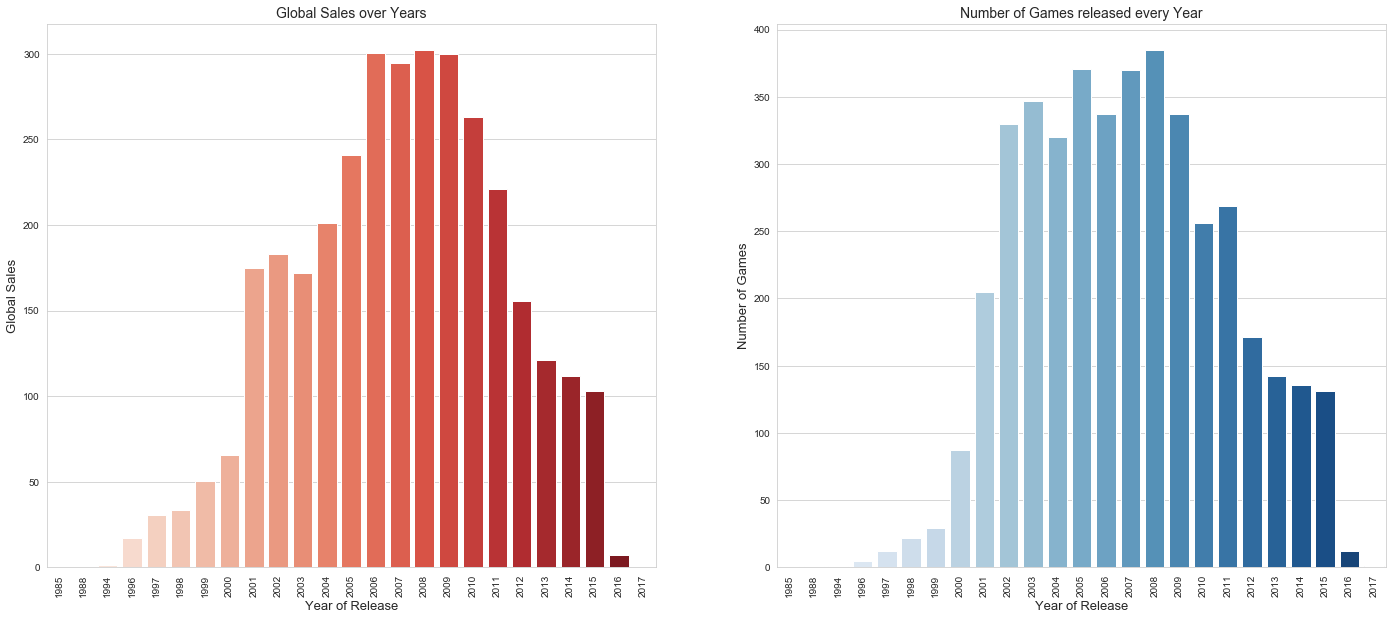

In [511]:
fig=plt.figure(figsize=(24,10))
plt.subplots_adjust(left=None, wspace=None, hspace=None)
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
plt.title('Global Sales over Years',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x='Year_of_Release',y='Global_Sales',data=data_le.groupby(data_le['Year_of_Release'].sort_values()).sum().Global_Sales.reset_index(),palette='Reds')
plt.ylabel('Global Sales',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13})

plt.subplot(1, 2, 2)
plt.title('Number of Games released every Year',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x=data_le.Year_of_Release.value_counts().index, y=data_le.Year_of_Release.value_counts(),palette='Blues');
plt.ylabel('Number of Games',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13});

In [512]:
data_le.describe(include = 'O').transpose()


count unique                                        top  freq
Name       4278   4278  Final Fantasy IV: The Complete Collection     1
Genre      4278     12                                     Action   839
Publisher  4278    244                            Electronic Arts   388
Developer  4278   1180                                     Capcom    94
Rating     4278      5                                          T  1564
Platform   4278    402                                        PS2   597

# Api Calls for the Console info

In [58]:
api_key = config.api_key

headers = {
    'x-rapidapi-host': "rawg-video-games-database.p.rapidapi.com",
    'x-rapidapi-key': f"{api_key}"
    }
console_data = []
for i in range(1,100):    ### Consoles in api call some are empty and i know there isn't more then 100 consoles
    url = f"https://rawg-video-games-database.p.rapidapi.com/platforms/{i}"
    response = requests.request("GET", url, headers=headers)
    if response == '{"detail":"Not found."}':
        break
    else:
        console_data.append(response.json())

console_data

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [704]:
#making copy of api info
console_data_copy = console_data.copy()
console_data_copy

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [59]:
# removing empty "{"detail":"Not found."}" from api call list of dictionaries
console_data_copy = [x for x in console_data_copy if keys is not 'detail' in x]

console_data_copy

NameError: name 'keys' is not defined

In [678]:
# for i in range(0,len(console_data_copy)):
#     if console_data_copy[i] == {'detail': 'Not found.'}:
#         console_data_copy.remove(console_data_copy[i])
#         continue
#     else:
#         break
# console_data_copy



[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [672]:
# for i in range(0,len(console_data_copy)):
#     data_consoles = pd.DataFrame.from_dict(console_data_copy[i])

# data_consoles

ValueError: If using all scalar values, you must pass an index

In [742]:
data_consoles = pd.DataFrame.from_dict(console_data_copy)
data_consoles.drop(columns = ['year_end' ,'year_start', 'detail', 'image'])


description  games_count    id  \
0   <p>Xbox One is a home video game console relea...       2942.0   1.0   
1                                                 NaN          NaN   NaN   
2   <p>iOS is an operating system initially develo...      64520.0   3.0   
3   <p>PC games, or personal computer games, start...     194331.0   4.0   
4   <p>MacOS (previously OS X) is an operating sys...      45674.0   5.0   
5   <p>Linux is a free and open-source software op...      30416.0   6.0   
6   <p>Nintendo Switch is a hybrid video game cons...       3025.0   7.0   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...       1706.0   8.0   
8   <p>Nintendo DS is Nintendo’s fourth major port...       2239.0   9.0   
9   <p>Nintendo Wii U is the sixth major home vide...       1271.0  10.0   
10  <p>Wii is Nintendo’s fifth major home video ga...       2291.0  11.0   
11  <p>NEOGEO is a cartridge-based arcade system b...         37.0  12.0   
12                                                            16.0  13.0   
13  <p>Xbox 360 is a home video game console relea...       2477.0  14.0   
14  <p>PlayStation 2 is the sixth generation video...       1708.0  15.0   
15  <p>PS3 is a home gaming console released by So...       3545.0  16.0   
16  <p>PSP, or PlayStation Portable, is the first ...       1524.0  17.0   
17  <p>PlayStation 4 is a home video game console ...       4313.0  18.0   
18  <p>PS Vita is a handheld video game console re...       1872.0  19.0   
19                                                NaN          NaN   NaN   
20  <p>Android is a mobile operating system based ...      26868.0  21.0   
21  <p>Atari Flashback is a series of dedicated vi...         29.0  22.0   
22  <p>Atari 2600 (initially released an Atari Vid...        275.0  23.0   
23  <p>Game Boy Advance is Nintendo’s third major ...        875.0  24.0   
24  <p>Atari 8-bit family is a series of home comp...        297.0  25.0   
25  <p>Game Boy is the first major portable video ...        564.0  26.0   
26  <p>PlayStation is a home video game console re...       1455.0  27.0   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         53.0  28.0   
28                                                NaN          NaN   NaN   
29                                                NaN          NaN   NaN   
..                                                ...          ...   ...   
69                                                NaN          NaN   NaN   
70                                                NaN          NaN   NaN   
71                                                NaN          NaN   NaN   
72                                                NaN          NaN   NaN   
73  <p>SEGA Master System (also known as Mark III ...        194.0  74.0   
74                                                NaN          NaN   NaN   
75                                                NaN          NaN   NaN   
76  <p>Game Gear is the first portable video game ...        149.0  77.0   
77                                                NaN          NaN   NaN   
78  <p>Super Nintendo Entertainment System or SNES...        761.0  79.0   
79  <p>Xbox is a home video game console released ...        617.0  80.0   
80                                                NaN          NaN   NaN   
81                                                NaN          NaN   NaN   
82  <p>Nintendo 64 is the third major video game h...        347.0  83.0   
83                                                NaN          NaN   NaN   
84                                                NaN          NaN   NaN   
85                                                NaN          NaN   NaN   
86                                                NaN          NaN   NaN   
87                                                NaN          NaN   NaN   
88                                                NaN          NaN   NaN   
89                                                NaN          NaN   NaN   
90            

In [732]:
data_consoles.dropna(how='all')

Empty DataFrame
Columns: [description, detail, games_count, id, image, image_background, name, slug, year_end, year_start]
Index: []

In [748]:
data_consoles2 = data_consoles
data_consoles2.usecols=['id' ,'year_start', 'detail', 'image']

data_consoles2 = data_consoles2.dropna(how='all')


In [749]:
data_consoles2

description      detail  \
0   <p>Xbox One is a home video game console relea...         NaN   
1                                                 NaN  Not found.   
2   <p>iOS is an operating system initially develo...         NaN   
3   <p>PC games, or personal computer games, start...         NaN   
4   <p>MacOS (previously OS X) is an operating sys...         NaN   
5   <p>Linux is a free and open-source software op...         NaN   
6   <p>Nintendo Switch is a hybrid video game cons...         NaN   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...         NaN   
8   <p>Nintendo DS is Nintendo’s fourth major port...         NaN   
9   <p>Nintendo Wii U is the sixth major home vide...         NaN   
10  <p>Wii is Nintendo’s fifth major home video ga...         NaN   
11  <p>NEOGEO is a cartridge-based arcade system b...         NaN   
12                                                            NaN   
13  <p>Xbox 360 is a home video game console relea...         NaN   
14  <p>PlayStation 2 is the sixth generation video...         NaN   
15  <p>PS3 is a home gaming console released by So...         NaN   
16  <p>PSP, or PlayStation Portable, is the first ...         NaN   
17  <p>PlayStation 4 is a home video game console ...         NaN   
18  <p>PS Vita is a handheld video game console re...         NaN   
19                                                NaN  Not found.   
20  <p>Android is a mobile operating system based ...         NaN   
21  <p>Atari Flashback is a series of dedicated vi...         NaN   
22  <p>Atari 2600 (initially released an Atari Vid...         NaN   
23  <p>Game Boy Advance is Nintendo’s third major ...         NaN   
24  <p>Atari 8-bit family is a series of home comp...         NaN   
25  <p>Game Boy is the first major portable video ...         NaN   
26  <p>PlayStation is a home video game console re...         NaN   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         NaN   
28                                                NaN  Not found.   
29                                                NaN  Not found.   
..                                                ...         ...   
69                                                NaN  Not found.   
70                                                NaN  Not found.   
71                                                NaN  Not found.   
72                                                NaN  Not found.   
73  <p>SEGA Master System (also known as Mark III ...         NaN   
74                                                NaN  Not found.   
75                                                NaN  Not found.   
76  <p>Game Gear is the first portable video game ...         NaN   
77                                                NaN  Not found.   
78  <p>Super Nintendo Entertainment System or SNES...         NaN   
79  <p>Xbox is a home video game console released ...         NaN   
80                                                NaN  Not found.   
81                                                NaN  Not found.   
82  <p>Nintendo 64 is the third major video game h...         NaN   
83                                                NaN  Not found.   
84                                                NaN  Not found.   
85                                                NaN  Not found.   
86                                                NaN  Not found.   
87                                                NaN  Not found.   
88                                                NaN  Not found.   
89                                                NaN  Not found.   
90                                                NaN  Not found.   
91                                                NaN  Not found.   
92                                                NaN  Not found.   
93                                                NaN  Not found.   
94                                                NaN  Not found.   
95                                      

# Web scrapping console sell 

In [245]:
# Scrapping console sales data
URL = 'http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/'
r = requests.get(URL)


# Combining both urls into one 'soup'
soup = BeautifulSoup(r.content , 'html.parser')

#printing in sytlized text to read easier
print(soup.prettify()) 


<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- VGCHARTZ MAIN HEADER TAGS -->
  <!-- Venatus Market Ad-Manager (vgchartz.com) -->
  <script>
   (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
  </script>
  <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
  <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
  <script src="http://www.google-analytics.com/urchin.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   _uac

In [385]:
list(soup.children)

['html', '\n', <html lang="en">
 <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uac

In [386]:
[type(item) for item in list(soup.children)]


[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [388]:
html = list(soup.children)[2]
html

<html lang="en">
<head>
<!-- VGCHARTZ MAIN HEADER TAGS -->
<!-- Venatus Market Ad-Manager (vgchartz.com) -->
<script>
    (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
    </script>
<!-- / Venatus Market Ad-Manager (vgchartz.com) -->
<meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
<script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
<script type="text/javascript">
        _uacct = "UA-2243248-1";
     

In [390]:
list(html.children)


['\n', <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uacct = "UA-2243248-1";
     

In [389]:
# 
console_sales_table = soup.find_all(class_='chart')
console_sales_table


[<table cellpadding="0" cellspacing="0" class="chart" id="myTable" width="100%">
 <thead>
 <tr>
 <th>Pos</th>
 <th style="text-align:left;">Platform</th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/NA/">North America</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/EU/">Europe</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/JP/">Japan</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/ROW/">Rest of World</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/" id="selected">Global</a></center></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td><a href="http://www.vgchartz.com/gamedb/games.php?console=PS2">PlayStation 2 (PS2)</a></td>
 <td><center>53.65</center></td>
 <td><center>55.28</center></td>
 <td><center>23.18</center></td>
 <td><center>25.57</cent

In [400]:
table_header=soup.find_all('th').get_text()

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [399]:
table_data=soup.find_all('td')
table_data

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [14]:
data

Name Platform  Year_of_Release  \
0                                        Wii Sports      Wii           2006.0   
2                                    Mario Kart Wii      Wii           2008.0   
3                                 Wii Sports Resort      Wii           2009.0   
6                             New Super Mario Bros.       DS           2006.0   
7                                          Wii Play      Wii           2006.0   
8                         New Super Mario Bros. Wii      Wii           2009.0   
11                                    Mario Kart DS       DS           2005.0   
13                                          Wii Fit      Wii           2007.0   
14                               Kinect Adventures!     X360           2010.0   
15                                     Wii Fit Plus      Wii           2009.0   
16                               Grand Theft Auto V      PS3           2013.0   
17                    Grand Theft Auto: San Andreas      PS2           2004.0   
19     Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
23                               Grand Theft Auto V     X360           2013.0   
24                      Grand Theft Auto: Vice City      PS2           2002.0   
26      Brain Age 2: More Training in Minutes a Day       DS           2005.0   
28                           Gran Turismo 3: A-Spec      PS2           2001.0   
29                   Call of Duty: Modern Warfare 3     X360           2011.0   
32                          Call of Duty: Black Ops     X360           2010.0   
34                       Call of Duty: Black Ops II      PS3           2012.0   
35                       Call of Duty: Black Ops II     X360           2012.0   
36                   Call of Duty: Modern Warfare 2     X360           2009.0   
37                   Call of Duty: Modern Warfare 3      PS3           2011.0   
38                             Grand Theft Auto III      PS2           2001.0   
39                          Super Smash Bros. Brawl      Wii           2008.0   
40                                     Mario Kart 7      3DS           2011.0   
41                          Call of Duty: Black Ops      PS3           2010.0   
42                               Grand Theft Auto V      PS4           2014.0   
43                      Animal Crossing: Wild World       DS           2005.0   
44                                           Halo 3     X360           2007.0   
...                                             ...      ...              ...   
16513                                        Ride 2       PC           2016.0   
16514                      Art Academy: Home Studio     WiiU           2015.0   
16527                               Icewind Dale II       PC           2002.0   
16530                                    Dungeons 2      PS4           2016.0   
16532                     Pro Evolution Soccer 2010       PC           2009.0   
16533           Hoshigami: Ruining Blue Earth Remix       DS           2007.0   
16534                       Carmageddon: Max Damage      PS4           2016.0   
16536                             Alone in the Dark       PC           2008.0   
16541                        Clive Barker's Jericho       PC           2007.0   
16549                   Madagascar: Escape 2 Africa       PC           2008.0   
16550                   Wade Hixton's Counter Punch      GBA           2004.0   
16553                               Sega Rally Revo       PC           2007.0   
16569                  Egg Mania: Eggstreme Madness       GC           2002.0   
16573                  The Eye of Judgment: Legends      PSP           2010.0   
16576               King's Bounty: Armored Princess       PC           2009.0   
16588               Transformers: Fall of Cybertron       PC           2012.0   
16595                             Micro Machines V4      PS2           2006.0   
16601                   Saints Row: Gat out of Hell     XOne           2015.0 

# Correlation

In [ ]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

In [ ]:
corr.describe(include="all")

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='coolwarm')


## OLM

### OLM for Global_Sales~NA_Sales

In [ ]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~NA_Sales", data=data_le).fit()
data_reg_simple.summary()

### OLM for Global_Sales~EU_Sales

In [ ]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

### OLM for NA_Sales~EU_Sales

In [ ]:
abs(corr).sort_values(by = 'NA_Sales',  ascending= False)['NA_Sales']
data_reg_simple = ols(formula= "NA_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

### OLM for Critic_Score~User_Score

In [ ]:
abs(corr).sort_values(by = 'Critic_Score',  ascending= False)['Critic_Score']
data_reg_simple = ols(formula= "Critic_Score~User_Score", data=data_le).fit()
data_reg_simple.summary()

# Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

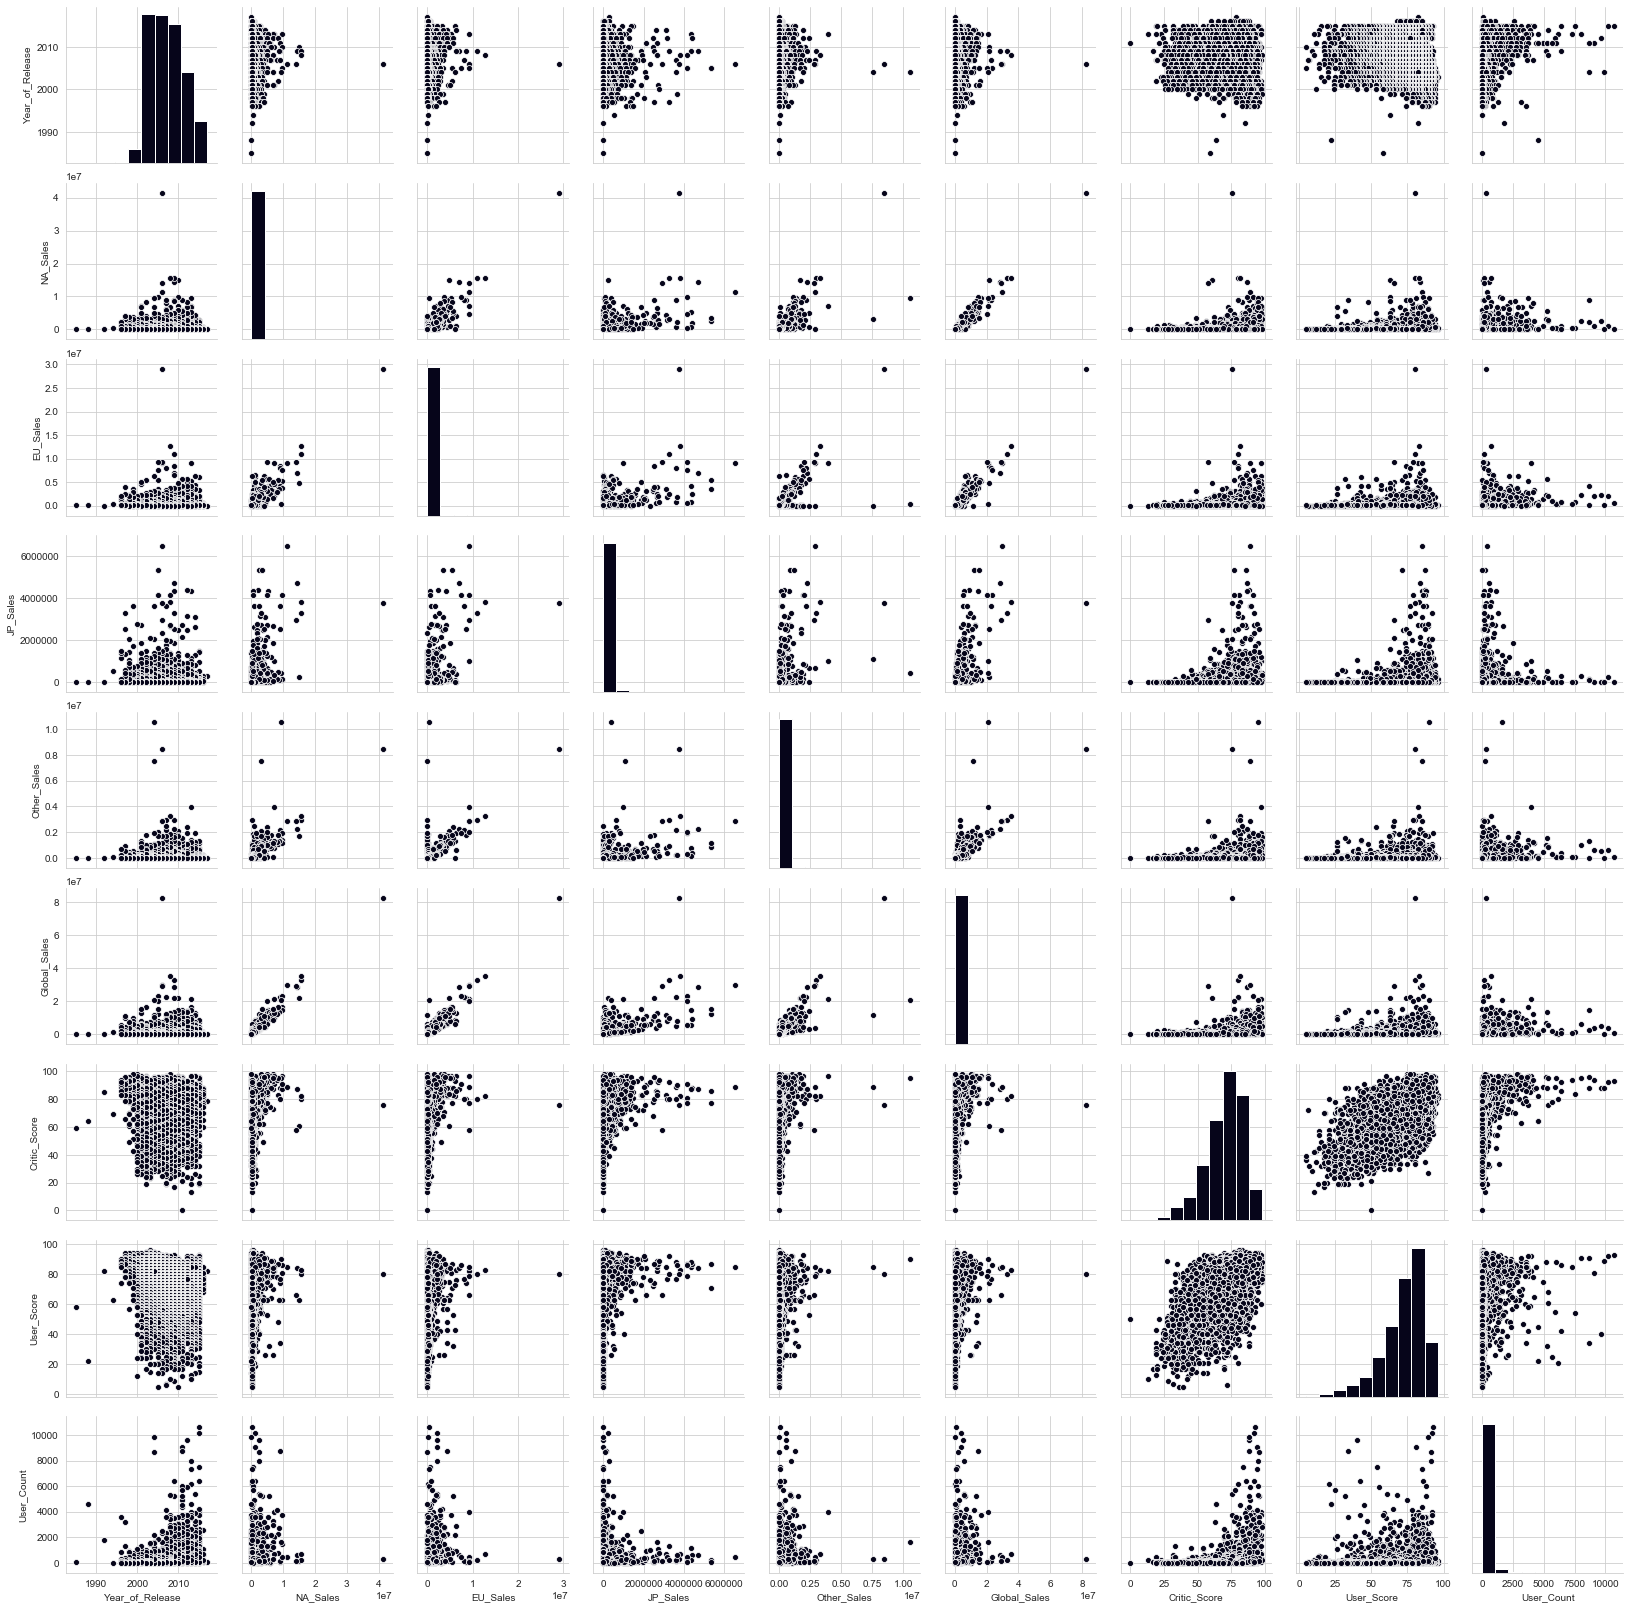

In [377]:
sns.pairplot(data_original, kind='scatter', dropna=True)

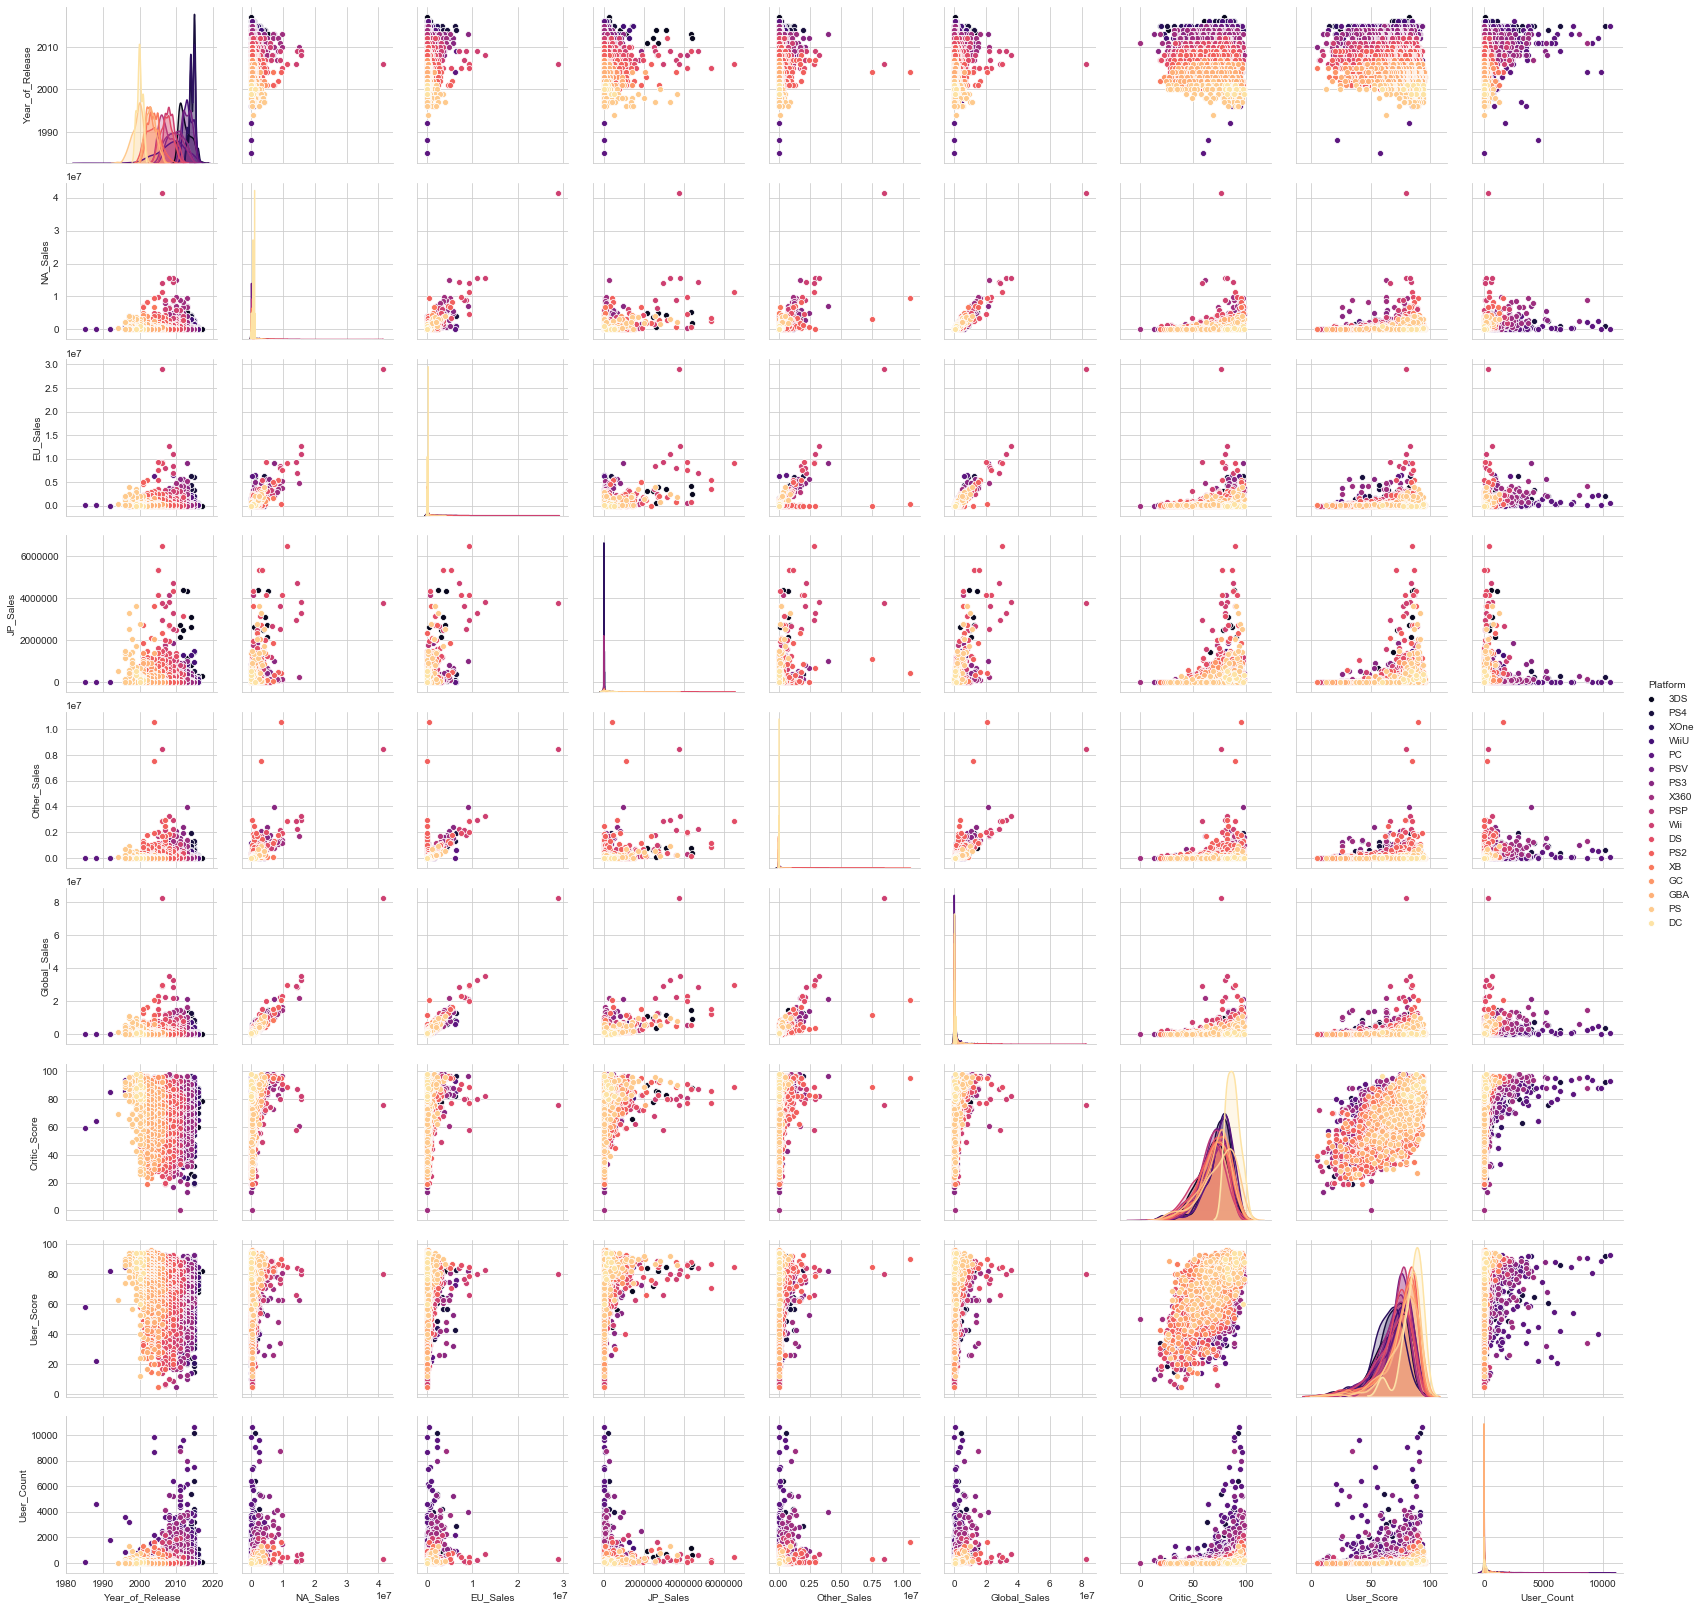

In [379]:
sns.pairplot(data_original, hue ='Platform', palette ='magma')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



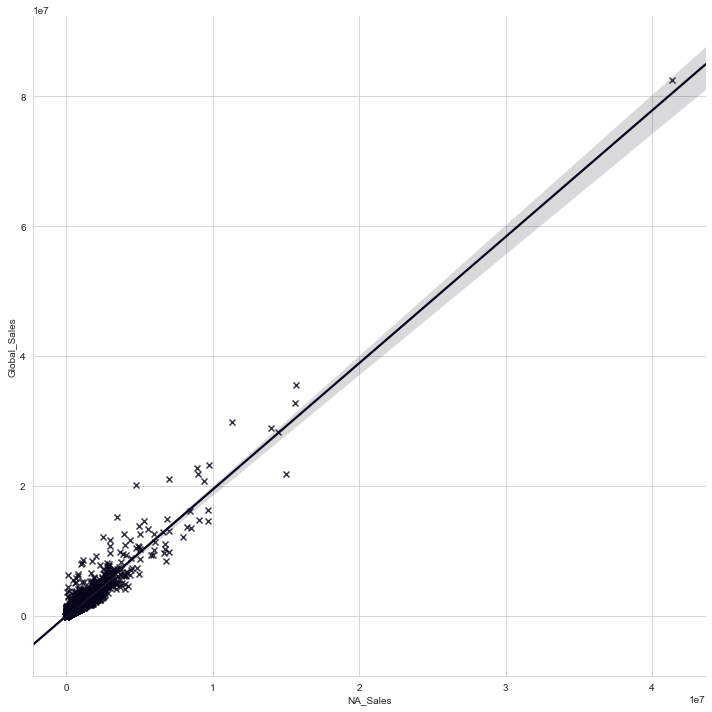

In [378]:

sns.lmplot(x='NA_Sales', y='Global_Sales', data= data_original, markers=[ "x"], fit_reg =True,size = 10)


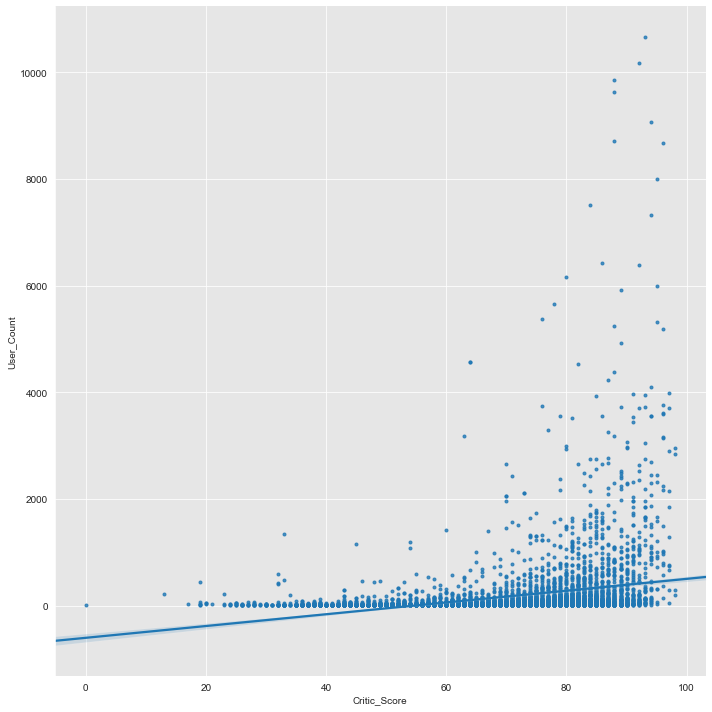

In [76]:
sns.lmplot(x='Critic_Score', y='User_Count', data= data_le, markers=["."], fit_reg =True,size = 10)

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



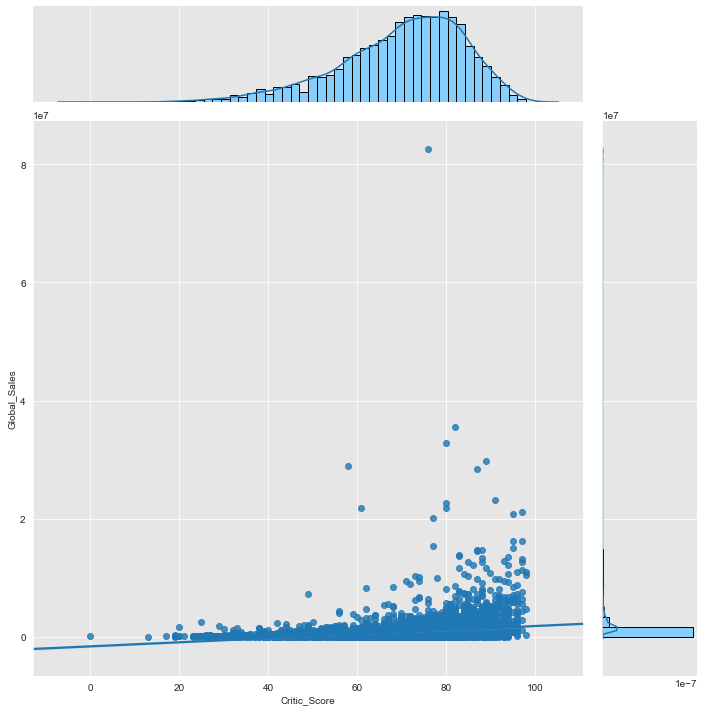

In [77]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

In [ ]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

Box plot of the relationship for type against rank and score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

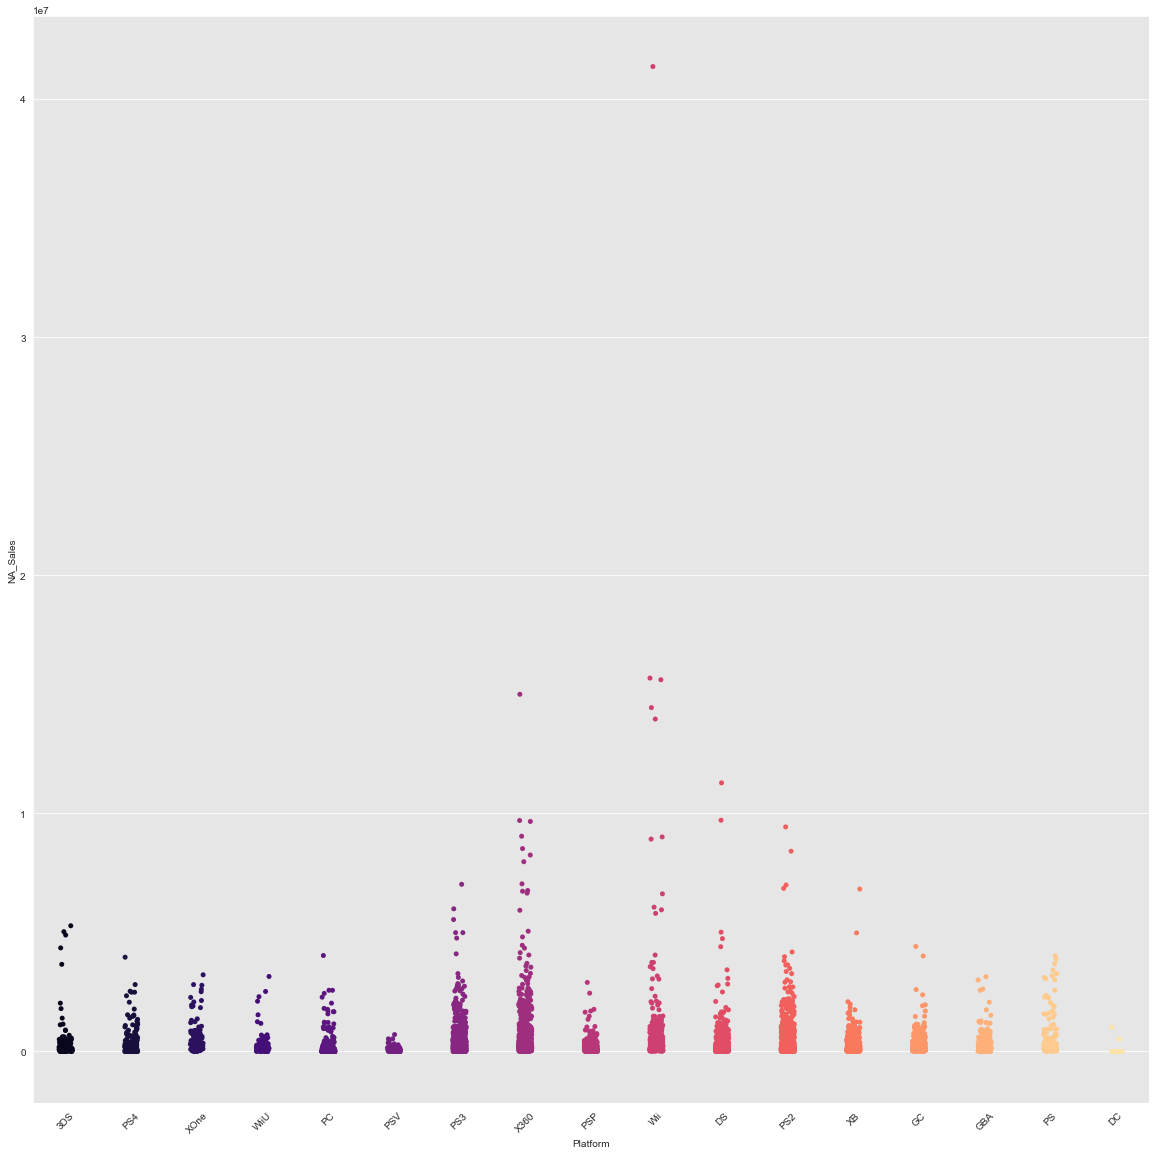

In [78]:
fig, ax = plt.subplots(figsize=(20,20))
sns.stripplot(data=data_le, x='Platform',y= 'NA_Sales' , orient='v', palette ='magma')
# plt.gca().invert_yaxis()
plt.ylim()
plt.xticks(rotation=45)

(-100, 16500000)

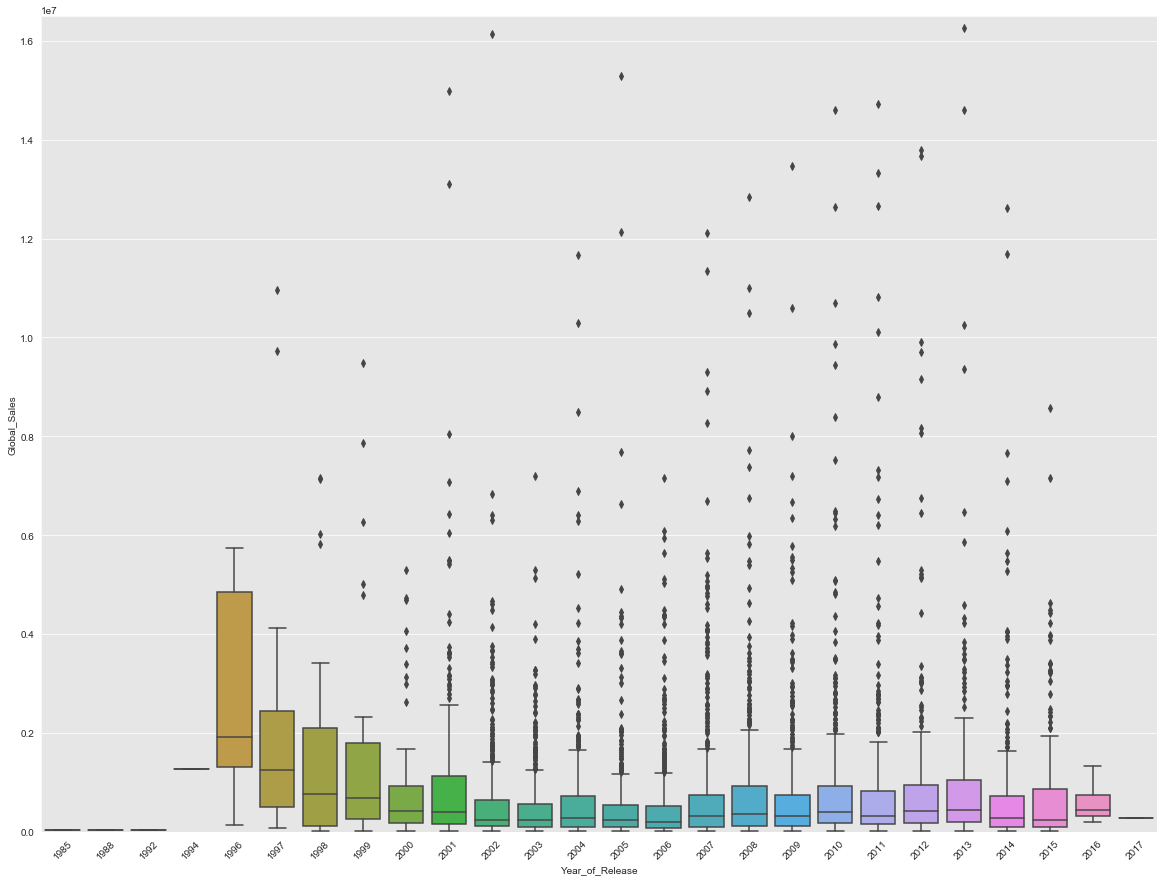

In [79]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data_le, x='Year_of_Release' ,y= 'Global_Sales', orient='v', )
plt.xticks(rotation=45)
# had to limit y axis the graph was very small (one outlier on 2006 @ 8.2 million not shown)
plt.ylim(-100,16500000) 

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

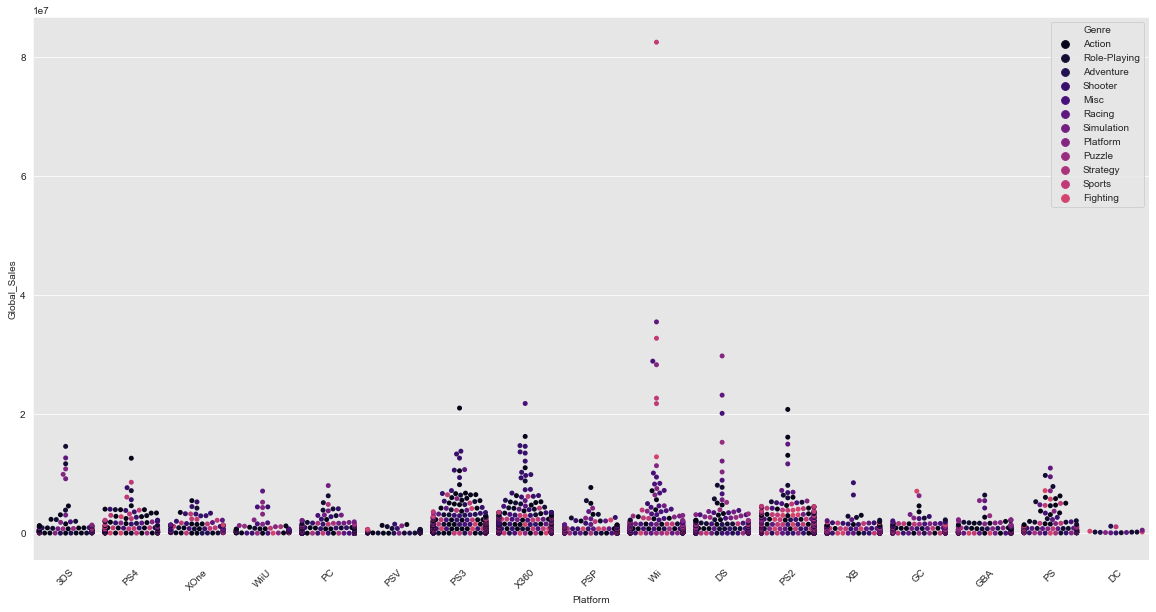

In [133]:
sns.set_palette("magma", 20)
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='Platform', y= 'Global_Sales', size=5, hue='Genre',cmap='ReW')
plt.xticks(rotation =45)


([<matplotlib.axis.XTick at 0x1c40b213c8>,
 <a list of 2 Text xticklabel objects>)

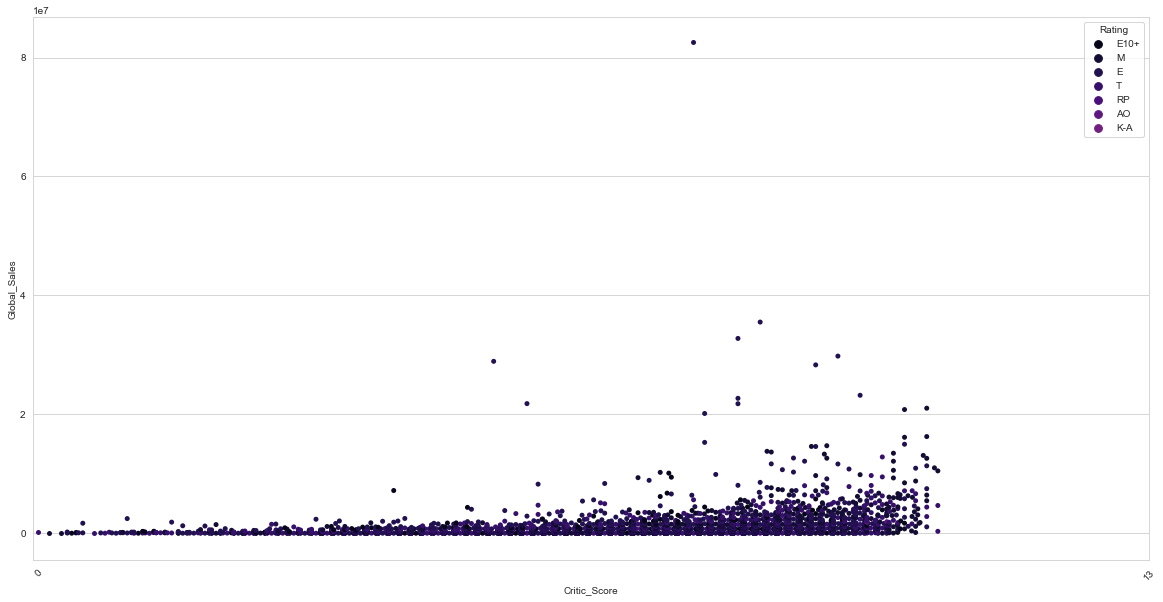

In [386]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='Critic_Score', y= 'Global_Sales', size=5, hue='Rating', )
plt.xticks((0,100),rotation =45)


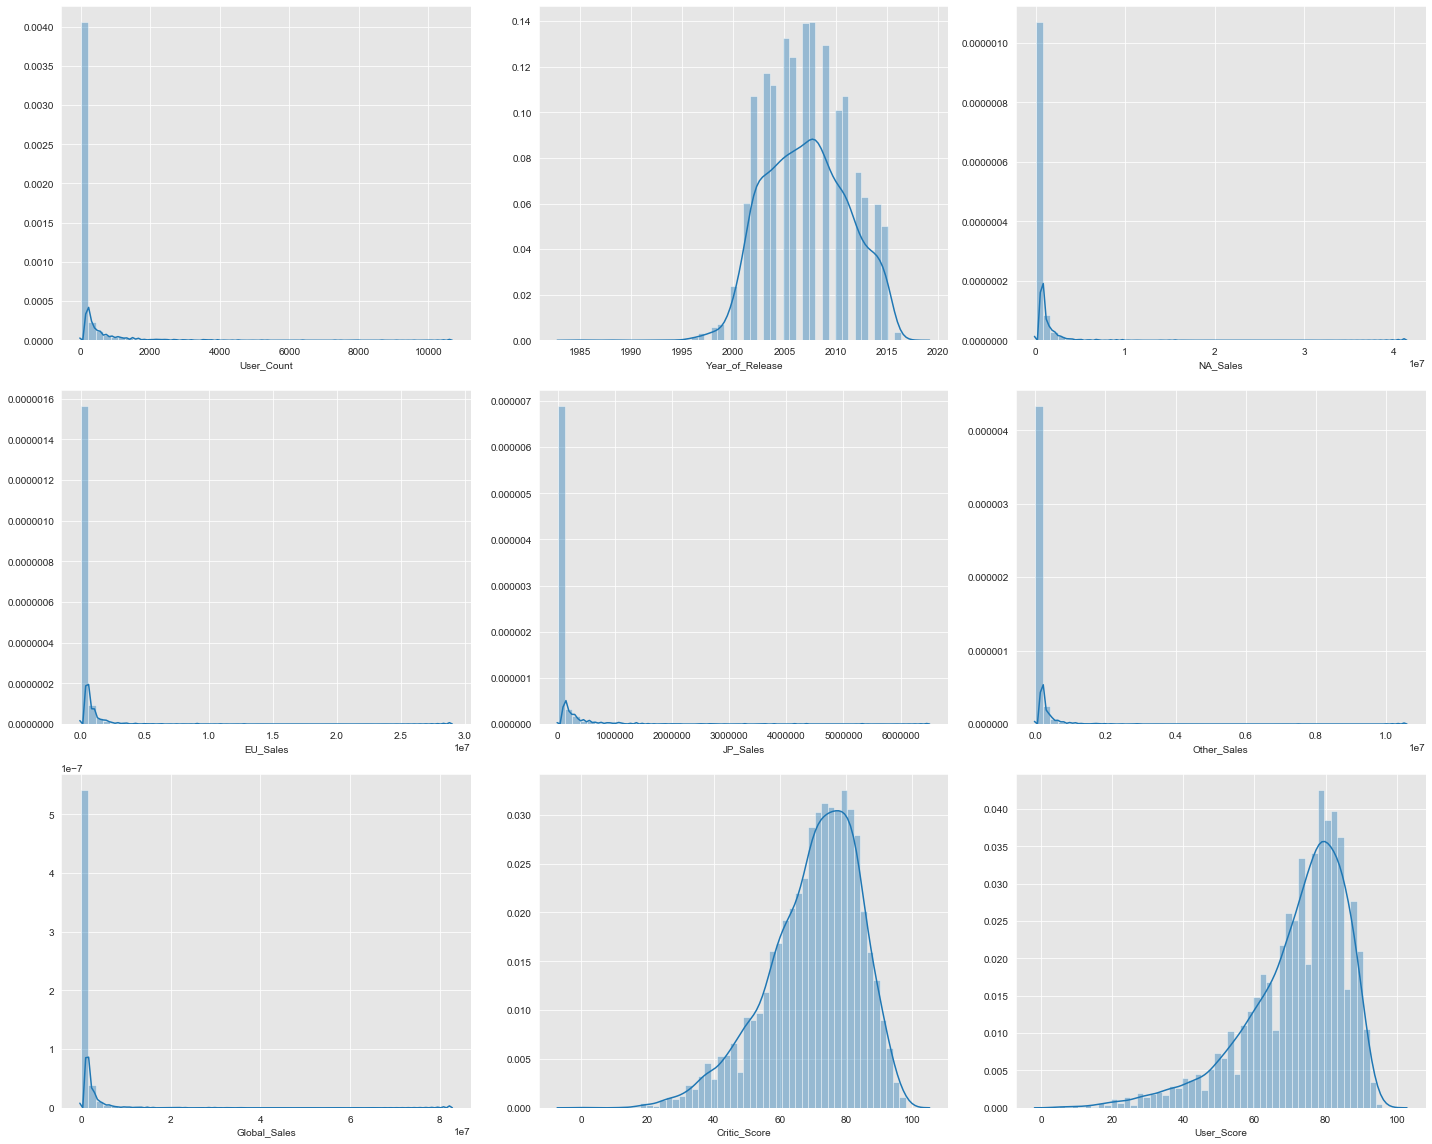

In [117]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_le_nums.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_le_nums[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

# Avg Sales against Consoles

In [517]:
NA_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend=dict(x=0.77, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor='light grey',
            xaxis=dict(title="Platform",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis=dict(title='Avg Sales (in Millions)',gridcolor="#DCDCDC"),
            title="Avg Sales from Different Markets and Consoles")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)


# Avg Sales against Genres

In [518]:
NA_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend = dict(x=0.8, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor ='light grey',
            xaxis = dict(title="Genre",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis = dict(title='Avg Sales (in Millions)',gridcolor="#DCDCDC"),
            title ="Avg Sales from Different Markets and Genres")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)




In [526]:
data_le['Global_Sales'].describe()

count    4278.000000
mean        0.783422
std         2.230370
min         0.010000
25%         0.100000
50%         0.260000
75%         0.710000
max        82.530000
Name: Global_Sales, dtype: float64

In [554]:
data_le_sales_clas = data_original.copy()
data_le_sales_clas['Sold_Classification'] = [3 if x  >= 7.5 else 1  if x  <= 1.5 else 2 for x in data_original['Global_Sales']]

glob_high_genre = data_le_sales_clas.groupby(['Genre','Sold_Classification']).Platform.count().unstack()
print(data_le_sales_clas.groupby(['Sold_Classification','Genre']).Global_Sales.count().unstack())

Genre                Action  Adventure  Fighting   Misc  Platform  Puzzle  \
Sold_Classification                                                         
1                    1396.0      226.0     332.0  313.0     337.0   105.0   
2                     168.0        9.0      36.0   59.0      50.0    12.0   
3                      10.0        NaN       1.0    8.0       7.0     1.0   

Genre                Racing  Role-Playing  Shooter  Simulation  Sports  \
Sold_Classification                                                      
1                     507.0         611.0    709.0       253.0   800.0   
2                      54.0          79.0    106.0        35.0   118.0   
3                       8.0           8.0     16.0         3.0     5.0   

Genre                Strategy  
Sold_Classification            
1                       256.0  
2                         6.0  
3                         NaN  


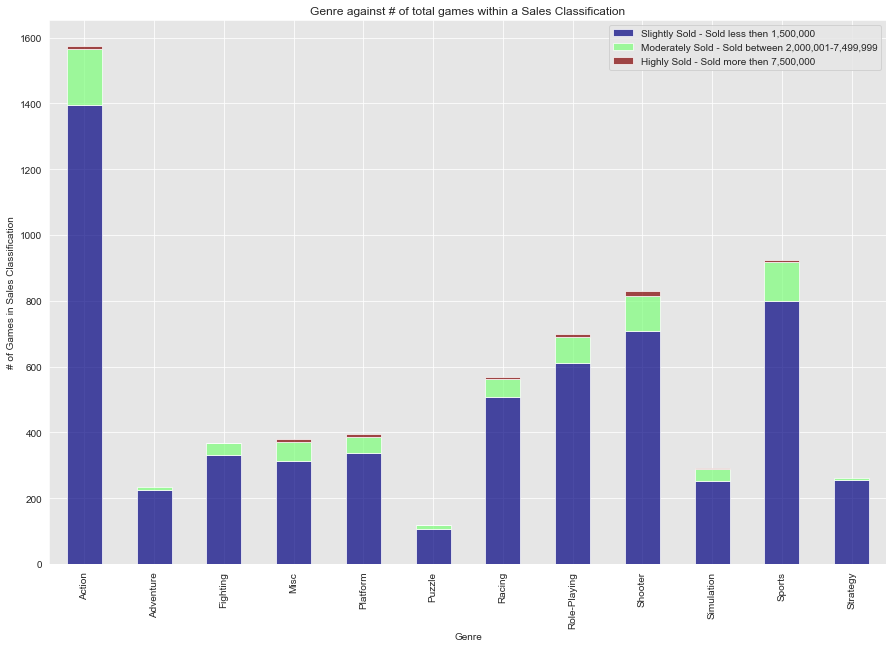

In [783]:

p2 = glob_high_genre.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='jet',figsize=(15,10))
p2.set_title('Genre against # of total games within a Sales Classification')
p2.set_xlabel('Genre')
p2.set_ylabel('# of Games in Sales Classification')
p2.legend(['Slightly Sold - Sold less then 1,500,000', 'Moderately Sold - Sold between 2,000,001-7,499,999','Highly Sold - Sold more then 7,500,000'])
plt.show()

In [543]:
data_le_sales_clas2 = data_original.copy()
data_le_sales_clas2['Sold_Classification'] = [3 if x  >= 7.5 else 1  if x  <= 1.5 else 2 for x in data_original['Global_Sales']]


glob_clas_plat = data_le_sales_clas2.groupby(['Platform','Sold_Classification']).Platform.count().unstack()
print(data_le_sales_clas.groupby(['Sold_Classification','Platform']).Global_Sales.count().unstack())

Platform              3DS  3DS,PS2  3DS,PS3,X360  3DS,PS3,X360,Wii,PC  \
Sold_Classification                                                     
1                    93.0      2.0           1.0                  1.0   
2                    10.0      NaN           NaN                  NaN   
3                     6.0      NaN           NaN                  NaN   

Platform             3DS,PSP  3DS,PSV  3DS,WiiU  3DS,WiiU,X360,PS3,PS4  \
Sold_Classification                                                      
1                        1.0      2.0       3.0                    1.0   
2                        NaN      NaN       NaN                    NaN   
3                        NaN      NaN       NaN                    NaN   

Platform             3DS,X360,PS3,DS,PC  3DS,X360,PS3,Wii  \
Sold_Classification                                         
1                                   1.0               1.0   
2                                   NaN               NaN   
3                  

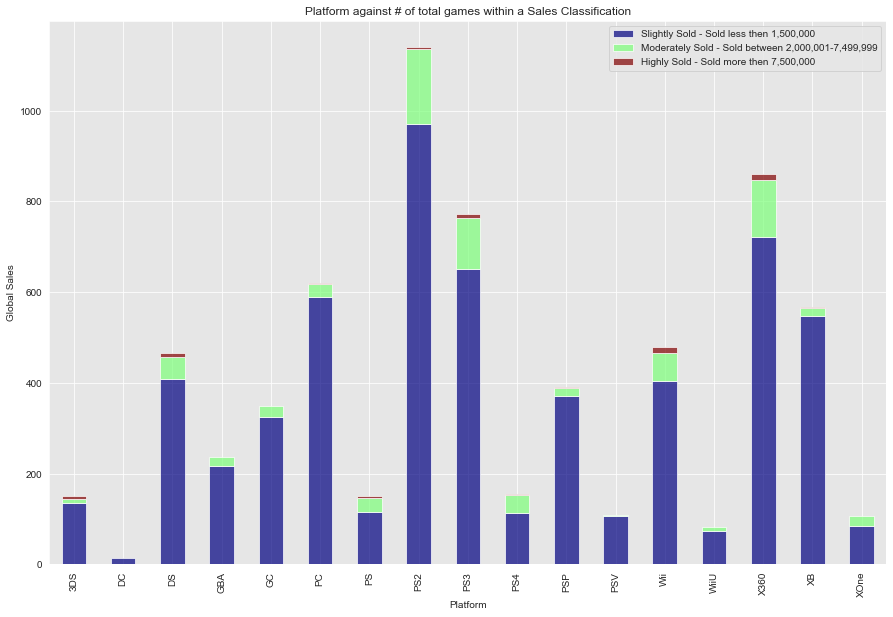

In [784]:
p3 = glob_clas_plat.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='jet',figsize=(15,10))
p3.set_title('Platform against # of total games within a Sales Classification')
p3.set_xlabel('Platform')
p3.set_ylabel('Global Sales')
p3.legend(['Slightly Sold - Sold less then 1,500,000', 'Moderately Sold - Sold between 2,000,001-7,499,999','Highly Sold - Sold more then 7,500,000'])
plt.show()

# Classification Modeling

## Setup for the Classifying

In [649]:
data_le_dummy.head(3)

Name  Year_of_Release  NA_Sales  EU_Sales  JP_Sales  \
0       Monster Hunter Stories             2017      0.00      0.00      0.28   
1  The Elder Scrolls V: Skyrim             2016      0.48      0.59      0.04   
6      Rise of the Tomb Raider             2016      0.23      0.53      0.04   

   Other_Sales  Global_Sales  Critic_Score  User_Score  User_Count  E  E10+  \
0         0.00          0.28            79        82.0        91.0  0     1   
1         0.21          1.33            81        71.0       624.0  0     0   
6         0.14          0.94            88        81.0      1082.0  0     0   

   M  RP  T  3DS  DC  DS  GC  PC  PS  PS2  PS3  PS4  PSP  PSV  Wii  WiiU  \
0  0   0  0    1   0   0   0   0   0    0    0    0    0    0    0     0   
1  1   0  0    0   0   0   0   1   0    0    1    1    0    0    0     0   
6  1   0  0    0   0   0   0   0   0    0    0    1    0    0    0     0   

   X360  XB  XOne  Action  Adventure  Fighting  Misc  Racing  Role-Playing  \
0     0   0     0       1          0         0     0       0             0   
1     1   0     1       0          0         0     0       0             1   
6     0   0     1       0          1         0     0       0             0   

   Shooter  Simulation  Sports  Strategy   Inc  10TACLE Studios  1C Company  \
0        0           0       0         0     0                0           0   
1        0           0       0         0     0                0           0   
6        0           0       0         0     0                0           0   

   2D Boy  3DO  505 Games  AQ Interactive  ASCII Entertainment  \
0       0    0          0               0                    0   
1       0    0          0               0                    0   
6       0    0          0               0                    0   

   Acclaim Entertainment  Ackkstudios  Acquire  Activision  \
0                      0            0        0           0   
1                      0            0        0           0   
6                      0            0        0           0   

   Activision Blizzard  Activision Value  Agatsuma Entertainment  Agetec  \
0                    0                 0                       0       0   
1                    0                 0                       0       0   
6                    0                 0                       0       0   

   Aksys Games  Aqua Plus  Arc System Works  Ascaron Entertainment GmbH  \
0            0          0                 0                           0   
1            0          0                 0                           0   
6            0          0                 0                           0   

   Aspyr  Atari  Atlus  Avalon Interactive  BAM! Entertainment  Banpresto  \
0      0      0      0                   0                   0          0   
1      0      0      0                   0                   0          0   
6      0      0      0                   0                   0          0   

   Bethesda Softworks  Bigben Interactive  Black Bean Games  Blue Byte  \
0                   0                   0                 0          0   
1                   1                   0                 0          0   
6                   0                   0                 0          0   

   Bohemia Interactive  Brash Entertainment  CCP  CDV Software Entertainment  \
0                    0                    0    0                           0   
1                    0                    0    0                           0   
6                    0                    0    0                           0   

   Capcom  Cave  City Interactive  Cloud Imperium Games Corporation  \
0       1     0                 0                                 0   
1       0     0                 0                                 0   
6       0     0                 0                                 0   

   Codemasters  Codemasters Online  Compile Heart  Conspiracy Entertainment  \
0            0                   0    

In [653]:
data_dummy_sales_clas = data_le_dummy.copy()
data_dummy_crit_scor_clas = data_le_dummy.copy()

In [655]:
# separate global sales into 3 groups  {Slightly Sold = Global Sales @ 1,500,000 or less; Moderately Sold = Global Sales @ 1500,001-7,499,999; Highly Sold = Global Sales @ 7,500,000 or more}
data_dummy_sales_clas['Sold_Classification'] = data_le_dummy['Sold_Classification'] = ['Highly Sold' if x  >= 7.5 else "Slightly Sold"  if x  <= 1.5 else 'Moderately Sold' for x in data_le_dummy['Global_Sales']]


In [656]:
# separated Critic Score into 3 groups  {1 = score @ 50 or less; 2 = score @ 51-74; 3 = score @ 75 or more}

#Avg Critic_score is 72.768

data_dummy_crit_scor_clas['Critic_Score_Classification'] = data_le_dummy['Critic_Score_Classification'] = [L if x  >= 75 else 1  if x  <= 40 else 2 for x in data_le_dummy['Critic_Score']]



In [663]:
#dataframe with Global Sales Classification
data_dummy_sales_clas.tail(75)

Name  Year_of_Release  NA_Sales  \
6568                           007 Racing             2000      0.30   
6569                          Surfing H3O             2000      0.12   
6570                           HBO Boxing             2000      0.12   
6571        Mortal Kombat: Special Forces             2000      0.12   
6572                              Shenmue             1999      0.52   
6573         Harvest Moon: Back to Nature             1999      0.11   
6574               Tony Hawk's Pro Skater             1999      3.42   
6575                          Silent Hill             1999      0.71   
6576                       Gran Turismo 2             1999      3.88   
6577  Age of Empires II: The Age of Kings             1999      0.01   
6578                    Crash Team Racing             1999      2.57   
6579                      Parasite Eve II             1999      0.32   
6580          Digimon Digital Card Battle             1999      0.06   
6581                  The Longest Journey             1999      0.00   
6582       Lunar 2: Eternal Blue Complete             1999      0.19   
6583                      Bust A Groove 2             1999      0.04   
6584                          SoulCalibur             1999      0.00   
6585                           Ape Escape             1999      0.71   
6586                     Valkyrie Profile             1999      0.07   
6587                   Final Fantasy VIII             1999      2.28   
6588                            WipEout 3             1999      0.19   
6589          Need For Speed: High Stakes             1999      1.58   
6590                               Seaman             1999      0.00   
6591                The Legend of Dragoon             1999      0.94   
6592                         Dragon Valor             1999      0.04   
6593                         Chrono Cross             1999      0.62   
6594                               Driver             1999      3.11   
6595              Final Fantasy Anthology             1999      0.45   
6596          Frogger 2: Swampy's Revenge             1999      0.80   
6597                    Incredible Crisis             1999      0.04   
...                                   ...              ...       ...   
6613         Star Ocean: The Second Story             1998      0.26   
6614                            Xenogears             1998      0.29   
6615                          Suikoden II             1998      0.15   
6616              Bomberman Party Edition             1998      0.07   
6617                        Strikers 1945             1998      0.07   
6618                   Grand Theft Auto 2             1998      1.13   
6619                Gundam Battle Assault             1998      0.13   
6620                    Silhouette Mirage             1998      0.03   
6621                     Vanguard Bandits             1998      0.04   
6622  Clock Tower II: The Struggle Within             1998      0.02   
6623   Castlevania: Symphony of the Night             1997      0.58   
6624                    Final Fantasy VII             1997      3.01   
6625                              Alundra             1997      0.13   
6626              Oddworld: Abe's Oddysee             1997      0.75   
6627            Tenchu: Stealth Assassins             1997      0.95   
6628                         Gran Turismo             1997      4.02   
6629                Final Fantasy Tactics             1997      0.93   
6630                         Ace Combat 2             1997      0.16   
6631                            RPG Maker             1997      0.11   
6632                        Bushido Blade             1997      0.39   
6633                          Colony Wars             1997      0.24   
6634                             RayStorm             1997      0.04   
6635                        Resident Evil             1996      2.05   
6636                             Tekken 2             1996      2.26   
6637 

In [681]:
#dataframe with Critic Score Classification
data_dummy_crit_scor_clas.head()

Name  Year_of_Release  NA_Sales  EU_Sales  JP_Sales  \
0       Monster Hunter Stories             2017      0.00      0.00      0.28   
1  The Elder Scrolls V: Skyrim             2016      0.48      0.59      0.04   
6      Rise of the Tomb Raider             2016      0.23      0.53      0.04   
8             MLB 16: The Show             2016      0.72      0.00      0.00   
9                  Doom (2016)             2016      0.44      0.25      0.00   

   Other_Sales  Global_Sales  Critic_Score  User_Score  User_Count  E  E10+  \
0         0.00          0.28            79        82.0        91.0  0     1   
1         0.21          1.33            81        71.0       624.0  0     0   
6         0.14          0.94            88        81.0      1082.0  0     0   
8         0.17          0.89            85        73.0       182.0  1     0   
9         0.07          0.76            87        84.0       679.0  0     0   

   M  RP  T  3DS  DC  DS  GC  PC  PS  PS2  PS3  PS4  PSP  PSV  Wii  WiiU  \
0  0   0  0    1   0   0   0   0   0    0    0    0    0    0    0     0   
1  1   0  0    0   0   0   0   1   0    0    1    1    0    0    0     0   
6  1   0  0    0   0   0   0   0   0    0    0    1    0    0    0     0   
8  0   0  0    0   0   0   0   0   0    0    0    1    0    0    0     0   
9  1   0  0    0   0   0   0   1   0    0    0    0    0    0    0     0   

   X360  XB  XOne  Action  Adventure  Fighting  Misc  Racing  Role-Playing  \
0     0   0     0       1          0         0     0       0             0   
1     1   0     1       0          0         0     0       0             1   
6     0   0     1       0          1         0     0       0             0   
8     0   0     0       1          0         0     0       0             0   
9     0   0     1       0          0         0     0       0             0   

   Shooter  Simulation  Sports  Strategy   Inc  10TACLE Studios  1C Company  \
0        0           0       0         0     0                0           0   
1        0           0       0         0     0                0           0   
6        0           0       0         0     0                0           0   
8        0           0       0         0     0                0           0   
9        1           0       0         0     0                0           0   

   2D Boy  3DO  505 Games  AQ Interactive  ASCII Entertainment  \
0       0    0          0               0                    0   
1       0    0          0               0                    0   
6       0    0          0               0                    0   
8       0    0          0               0                    0   
9       0    0          0               0                    0   

   Acclaim Entertainment  Ackkstudios  Acquire  Activision  \
0                      0            0        0           0   
1                      0            0        0           0   
6                      0            0        0           0   
8                      0            0        0           0   
9                      0            0        0           0   

   Activision Blizzard  Activision Value  Agatsuma Entertainment  Agetec  \
0                    0                 0                       0       0   
1                    0                 0                       0       0   
6                    0                 0                       0       0   
8                    0                 0                       0       0   
9                    0                 0                       0       0   

   Aksys Games  Aqua Plus  Arc System Works  Ascaron Entertainment GmbH  \
0            0          0                 0                           0   
1            0          0                 0                           0   
6            0          0                 0                           0   
8            0          0                 0                           0   
9            0          0                 0                  

In [660]:
data_le_dummy = data_le_dummy.drop(columns=['Critic_Score_Classification', 'Sold_Classification'])
data_le_dummy.head(3)

## Classification for Global Sales

In [756]:


X = data_dummy_sales_clas.drop(['Sold_Classification','Name','3DO', 'ASCII Entertainment'
, 'Acquire'
, 'Atlus'
, 'Deep Silver'
, 'Eidos Interactive'
, 'Encore'
, 'Enix Corporation'
, 'From Software'
, 'GT Interactive'
, 'Game Factory'
, 'Global Star'
, 'Hudson Soft'
, 'Level 5'
, 'Myelin Media'
, 'Namco Bandai Games'
, 'NewKidCo'
, 'Nintendo'
, 'Pacific Century Cyber Works'
, 'Pinnacle'
, 'SCi'
, 'Square'
, 'Strategy'
, 'System 3 Arcade Software'
, 'TDK Mediactive'], axis = 1)
y = data_dummy_sales_clas['Sold_Classification']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

print(f'{X.shape},\n {y.shape} ')

(4278, 259),
 (4278,) 


In [757]:
for feature in sorted(zip(rf.feature_importances_, list(X_train.columns))):
    print(feature)

(0.0, ' Inc')
(0.0, 'AQ Interactive')
(0.0, 'Activision')
(0.0, 'Agatsuma Entertainment')
(0.0, 'Bigben Interactive')
(0.0, 'ESP')
(0.0, 'Focus Home Interactive')
(0.0, 'Funbox Media')
(0.0, 'Funcom')
(0.0, 'Ghostlight')
(0.0, 'GungHo')
(0.0, 'Gust')
(0.0, 'Human Entertainment')
(0.0, 'Kadokawa Shoten')
(0.0, 'Mercury Games')
(0.0, 'Paradox Interactive')
(0.0, 'Play It')
(0.0, 'Popcorn Arcade')
(0.0, 'RTL')
(0.0, 'Scholastic Inc.')
(0.0, 'Sony Computer Entertainment')
(0.0, 'Swing! Entertainment')
(0.0, 'Titus')
(0.0, 'Virgin Interactive')
(0.0, 'Visco')
(2.7458227372883794e-06, 'Irem Software Engineering')
(3.7902797932892544e-06, 'TalonSoft')
(4.449939455089421e-06, 'Blue Byte')
(6.7132127992062465e-06, 'Gotham Games')
(7.09867339302901e-06, 'Majesco Entertainment')
(9.286157566788214e-06, 'Cloud Imperium Games Corporation')
(9.847291281716779e-06, 'Little Orbit')
(1.1257664002474226e-05, 'Microsoft Game Studios')
(1.2668705183367076e-05, 'Metro 3D')
(1.4925239207616355e-05, 'Natsume

### Logistic Regression Model

In [758]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

logreg_accuracy_train = logreg.score(X_train ,y_train)
logreg_accuracy_test = logreg.score(X_test,y_test)

# Cross Validation - Logistic Regression

logreg_cross_val_score = cross_val_score(logreg, X,y, cv=10)
logreg_cv_score_avg = logreg_cross_val_score.mean()
cv_pred_logreg = cross_val_predict(logreg, X_test, y_test, cv=10)

print(f'Logistic Regression train accuracy is {logreg_accuracy_train}\nLogistic Regression test accuracy is {logreg_accuracy_test}\nMean Cross Validation logreg Regression is: {logreg_cv_score_avg}')


Logistic Regression train accuracy is 0.9809619238476954
Logistic Regression test accuracy is 0.9781931464174455
Mean Cross Validation logreg Regression is: 0.9808322310395496


## Classification for Critic's Score 

In [720]:
# Had to drop a few features to increase accuracy

X2 = data_dummy_crit_scor_clas.drop(['Critic_Score_Classification','Name','10TACLE Studios',
'Activision Blizzard',
'Ascaron Entertainment GmbH',
'Blue Byte',
'Bohemia Interactive',
'Conspiracy Entertainment',
'Crimson Cow',
'DSI Games',
'Devolver Digital','ESP','Fox Interactive','Gamebridge','Global A Entertainment',
'HMH Interactive',
'Harmonix Music Systems',
'Iceberg Interactive',
'Idea Factory International',
'Kool Kizz',
'Max Five',
'Maxis',
'Media Rings',
'Mud Duck Productions',
'Nobilis',
'NovaLogic',
'O3 Entertainment',
'Phantagram',
'Pinnacle',
'RP',
'Rebellion',
'Revolution Software',
'Sony Computer Entertainment America',
'Sunflowers',
'Sunsoft',
'TalonSoft',
'Valve Software',
'Visco',
'White Park Bay Software',
'Yacht Club Games','Zushi Games', 'Critic_Score'], axis = 1)
y2 = data_dummy_crit_scor_clas['Critic_Score_Classification']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=3)

print(f'{X2.shape},\n {y2.shape} ')

(4278, 244),
 (4278,) 


In [733]:
for feature in sorted(zip(rf.feature_importances_, list(X2_train.columns))):
    print(feature)

(0.0, '1C Company')
(0.0, 'ASCII Entertainment')
(0.0, 'Acquire')
(0.0, 'Agatsuma Entertainment')
(0.0, 'Bigben Interactive')
(0.0, 'Enterbrain')
(0.0, 'Funbox Media')
(0.0, 'GOA')
(0.0, 'GT Interactive')
(0.0, 'Gotham Games')
(0.0, 'Hasbro Interactive')
(0.0, 'Havas Interactive')
(0.0, 'Indie Games')
(0.0, 'Level 5')
(0.0, 'Monte Christo Multimedia')
(0.0, 'RTL')
(0.0, 'Reef Entertainment')
(0.0, 'Russel')
(0.0, 'SNK')
(0.0, 'Square')
(0.0, 'SquareSoft')
(0.0, 'Telltale Games')
(0.0, 'Valcon Games')
(0.0, 'bitComposer Games')
(0.0, 'inXile Entertainment')
(2.7458227372883794e-06, 'Kadokawa Shoten')
(3.7902797932892544e-06, 'Trion Worlds')
(4.449939455089421e-06, 'Brash Entertainment')
(6.7132127992062465e-06, 'Graphsim Entertainment')
(7.09867339302901e-06, 'Mercury Games')
(9.286157566788214e-06, 'Codemasters Online')
(9.847291281716779e-06, 'Marvelous Entertainment')
(1.1257664002474226e-05, 'NCSoft')
(1.2668705183367076e-05, 'Moss')
(1.4925239207616355e-05, 'Number None')
(1.538074

### KNN Model - Best Preformming Model 

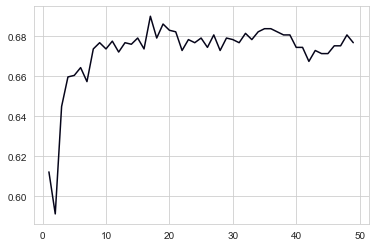

In [723]:
# Checking the optimal K-Nearest Neighbors from the range specified
k_range= range(1,50)
scores= []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    y2_pred_knn = knn.predict(X2_test)
    scores.append(metrics.accuracy_score(y2_test,y2_pred_knn))
plt.plot(k_range,scores)


In [826]:
# K_nearest Neighbor = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X2_test, y2_test)
y2_pred_knn5 = knn5.predict(X2_test)


# K_nearest Neighbor = 10 
knn10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn10.fit(X2_test, y2_test)
y2_pred_knn10 = knn10.predict(X2_test)


# Testing Accuracy
knn5_accuracy_train2 = knn5.score(X2_train,y2_train)
knn5_accuracy_test2 = knn5.score(X2_test,y2_test)

knn10_accuracy_train2 = knn10.score(X2_train,y2_train)
knn10_accuracy_test2 = knn10.score(X2_test,y2_test)

# Printing Accuracy
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train2}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test2}\n')
print(f'K_nearest Neighbor = 10 Regression train accuracy is {knn10_accuracy_train2}\nK_nearest Neighbor = 10 Regression test accuracy is {knn10_accuracy_test2}')

y2_predict_proba_knn5 = knn5.predict_proba(X2_test)

K_nearest Neighbor = 5 Regression train accuracy is 0.6412825651302605
K_nearest Neighbor = 5 Regression test accuracy is 0.7453271028037384

K_nearest Neighbor = 10 Regression train accuracy is 0.6603206412825652
K_nearest Neighbor = 10 Regression test accuracy is 0.7188473520249221


Confusion Matrix

In [811]:
print(confusion_matrix(y2_test, y2_pred_knn5))
print(classification_report(y2_test, y2_pred_knn5))

[[ 56  74   3]
 [ 23 541  86]
 [  3 138 360]]
              precision    recall  f1-score   support

           1       0.68      0.42      0.52       133
           2       0.72      0.83      0.77       650
           3       0.80      0.72      0.76       501

    accuracy                           0.75      1284
   macro avg       0.73      0.66      0.68      1284
weighted avg       0.75      0.75      0.74      1284



In [814]:
cm = confusion_matrix(y2_test,y2_pred_knn5)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

In [815]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 56  74   3]
 [ 23 541  86]
 [  3 138 360]]


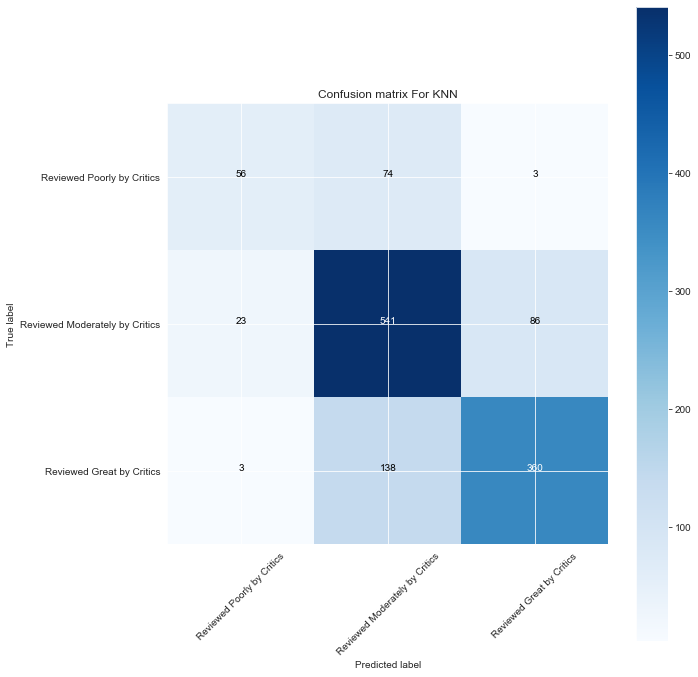

In [824]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix For KNN',
                          cmap=plt.cm.Blues,)

In [837]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_knn5[0:25])
print(f'Accurary from 1st 25 values is {(20/25)*100}%')

True: [2 2 3 2 1 3 1 3 2 2 3 3 3 2 3 1 1 2 2 3 3 2 3 2 2]
Pred: [2 2 3 2 2 3 1 3 2 2 2 3 3 2 3 1 3 2 2 2 3 2 2 2 2]
Accurary from 1st 25 values is 80.0%


### Logistic Regression Model

In [827]:
#LogisticRegression
logreg2= LogisticRegression()
logreg2.fit(X2_train,y2_train)
y2_pred_logreg = logreg2.predict(X2_test)

logreg_accuracy_train2 = logreg2.score(X2_train ,y2_train)
logreg_accuracy_test2 = logreg2.score(X2_test,y2_test)


# Cross Validation - Logistic Regression

logreg_cross_val_score2 = cross_val_score(logreg, X2,y2, cv=10)
logreg_cv_score_avg2 = logreg_cross_val_score.mean()
cv_pred_logreg2 = cross_val_predict(logreg2, X2_test, y2_test, cv=10)
                                              
             
print(f'Logistic Regression train accuracy is {logreg_accuracy_train2}\nLogistic Regression test accuracy is {logreg_accuracy_test2}\nMean Cross Validation logreg Regression is: {logreg_cv_score_avg2}')
y2_predict_proba_logreg2 = logreg2.predict_proba(X2_test)

Logistic Regression train accuracy is 0.7307949231796927
Logistic Regression test accuracy is 0.6806853582554517
Mean Cross Validation logreg Regression is: 0.9808322310395496


Confusion Matrix

In [841]:
print(confusion_matrix(y2_test, y2_pred_logreg))
print(classification_report(y2_test, y2_pred_logreg))

[[ 44  85   4]
 [ 17 452 181]
 [  1 122 378]]
              precision    recall  f1-score   support

           1       0.71      0.33      0.45       133
           2       0.69      0.70      0.69       650
           3       0.67      0.75      0.71       501

    accuracy                           0.68      1284
   macro avg       0.69      0.59      0.62      1284
weighted avg       0.68      0.68      0.67      1284



In [839]:
cm2 = confusion_matrix(y2_test,y2_pred_logreg)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

Confusion Matrix, without normalization
[[ 44  85   4]
 [ 17 452 181]
 [  1 122 378]]


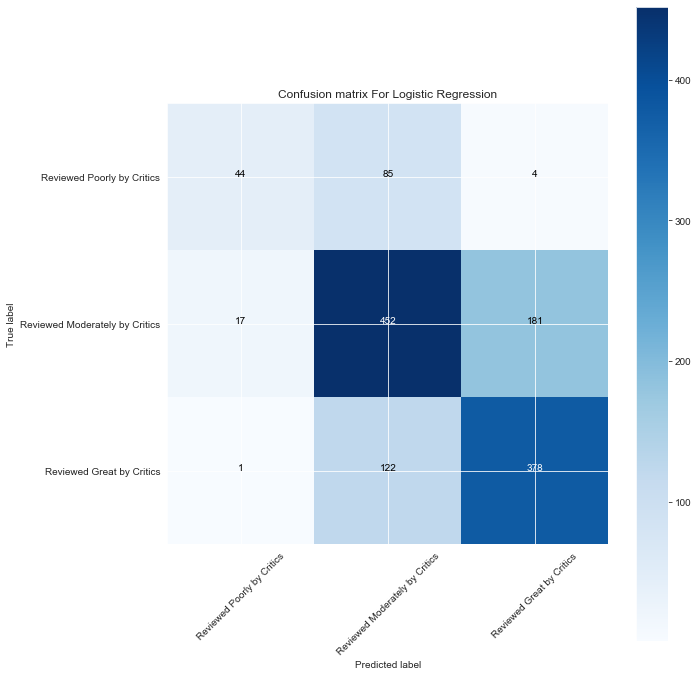

In [864]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix For Logistic Regression',
                          cmap=plt.cm.Blues,)

In [852]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_logreg[0:25])
print(f'Accurary from 1st 25 values is {(18/25)*100}%')

True: [2 2 3 2 1 3 1 3 2 2 3 3 3 2 3 1 1 2 2 3 3 2 3 2 2]
Pred: [2 2 3 2 2 2 2 3 2 2 2 3 3 2 3 2 2 2 2 3 3 2 3 2 2]
Accurary from 1st 25 values is 72.0%


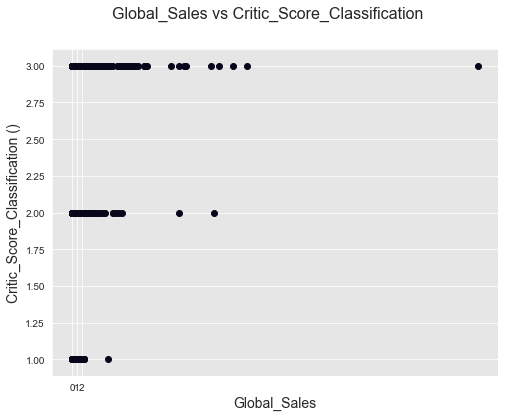

In [830]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Global_Sales vs Critic_Score_Classification', fontsize=16)
plt.scatter(data_dummy_crit_scor_clas['Global_Sales'], data_dummy_crit_scor_clas['Critic_Score_Classification'])
plt.xlabel('Global_Sales', fontsize=14)
plt.ylabel('Critic_Score_Classification ()', fontsize=14)
plt.xticks(np.arange(0, 3, 1))
plt.show()

### Random Forest Classifier

In [732]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X2_train,y2_train)
rf.score(X2_test,y2_test)
y2_pred_rf_2 = rf.predict(X2_test)

rf_accuracy_train_2 = rf.score(X2_train,y2_train)
rf_accuracy_test_2 = rf.score(X2_test,y2_test)

predict_acc = metrics.accuracy_score(y2_test,y2_pred_rf_2)
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_2}\nRandom Forest Classifier test accuracy is {rf_accuracy_test_2}\n'
        f'Random Forest Classifier predict accuracy is {predict_acc}')


Random Forest Classifier train accuracy is 0.9876419505678022
Random Forest Classifier test accuracy is 0.6791277258566978
Random Forest Classifier predict accuracy is 0.6791277258566978


Confusion Matrix

In [842]:
print(confusion_matrix(y2_test, y2_pred_rf_2))
print(classification_report(y2_test, y2_pred_rf_2))

[[ 45  81   7]
 [ 32 482 136]
 [  4 152 345]]
              precision    recall  f1-score   support

           1       0.56      0.34      0.42       133
           2       0.67      0.74      0.71       650
           3       0.71      0.69      0.70       501

    accuracy                           0.68      1284
   macro avg       0.65      0.59      0.61      1284
weighted avg       0.67      0.68      0.67      1284



In [853]:
cm3 = confusion_matrix(y2_test,y2_pred_rf_2)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

Confusion Matrix, without normalization
[[ 45  81   7]
 [ 32 482 136]
 [  4 152 345]]


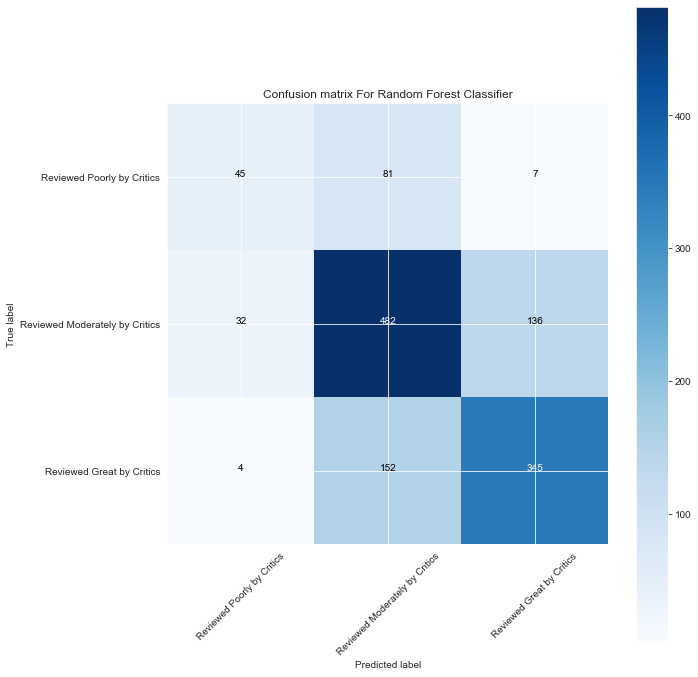

In [862]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm3, classes,
                          normalize=False,
                          title='Confusion matrix For Random Forest Classifier',
                          cmap=plt.cm.Blues,)

In [863]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_rf_2[0:25])
print(f'Accurary from 1st 25 values is {(13/25)*100}%')

True: [2 2 3 2 1 3 1 3 2 2 3 3 3 2 3 1 1 2 2 3 3 2 3 2 2]
Pred: [2 2 2 2 2 2 2 3 3 2 2 3 3 1 3 2 1 2 2 2 2 3 3 2 2]
Accurary from 1st 25 values is 52.0%


### Support Vector Classification

In [721]:
# SVC
svc = svm.SVC(kernel='linear')
svc.fit(X2_train,y2_train)
svc.score(X2_test,y2_test)
y2_pred_svc_2 = svc.predict(X2_test)

svc_accuracy_train_2 = svc.score(X2_train,y2_train)
svc_accuracy_test_2 = svc.score(X2_test,y2_test)

predict_acc2 = metrics.accuracy_score(y2_test,y2_pred_svc_2)
print(f'Support Vector Classification train accuracy is {svc_accuracy_train_2}\nSupport Vector Classification test accuracy is {svc_accuracy_test_2}\n'
        f'Support Vector Classification predict accuracy is {predict_acc2}')


Support Vector Classification train accuracy is 0.7074148296593187
Support Vector Classification test accuracy is 0.6830218068535826
Support Vector Classification predict accuracy is 0.6830218068535826


Confusion Matrix

In [842]:
print(confusion_matrix(y2_test, y2_pred_svc_2))
print(classification_report(y2_test, y2_pred_svc_2))

[[ 45  81   7]
 [ 32 482 136]
 [  4 152 345]]
              precision    recall  f1-score   support

           1       0.56      0.34      0.42       133
           2       0.67      0.74      0.71       650
           3       0.71      0.69      0.70       501

    accuracy                           0.68      1284
   macro avg       0.65      0.59      0.61      1284
weighted avg       0.67      0.68      0.67      1284



In [848]:
cm4 = confusion_matrix(y2_test,y2_pred_svc_2)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

Confusion Matrix, without normalization
[[ 47  83   3]
 [ 18 477 155]
 [  1 147 353]]


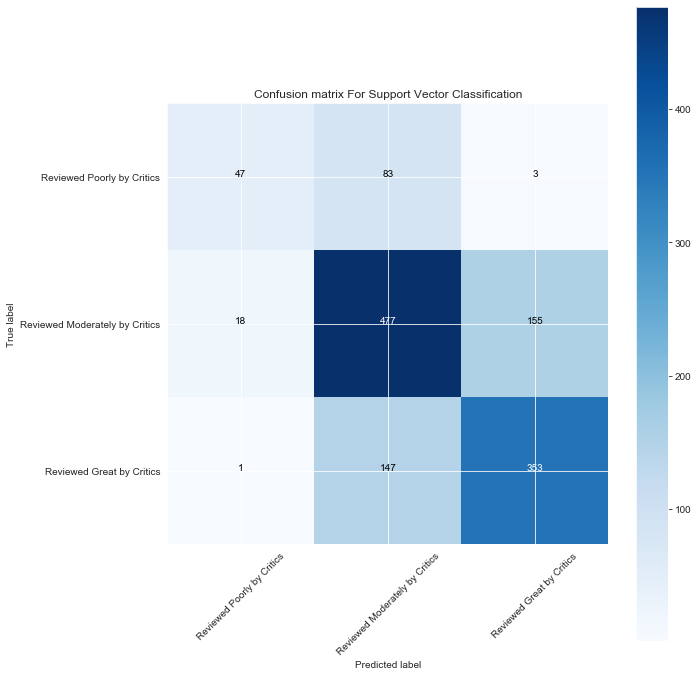

In [861]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm4, classes,
                          normalize=False,
                          title='Confusion matrix For Support Vector Classification',
                          cmap=plt.cm.Blues,)

In [873]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_svc_2[0:25])
print(f'Accurary from 1st 25 values is {(18/25)*100}%')

True: [2 2 3 2 1 3 1 3 2 2 3 3 3 2 3 1 1 2 2 3 3 2 3 2 2]
Pred: [2 2 3 2 2 2 2 3 2 2 2 3 3 2 2 2 2 2 2 3 3 2 3 2 2]
Accurary from 1st 25 values is 72.0%


### Decision Tree Classifier

In [801]:
#Decision Tree Classifier
dt2= DecisionTreeClassifier()
dt2.fit(X2_train,y2_train)
y2_pred_dt = dt2.predict(X2_test)

dt_accuracy_train2 = dt2.score(X2_train ,y2_train)
dt_accuracy_test2 = dt2.score(X2_test,y2_test)


# Cross Validation - Logistic Regression

dt_cross_val_score2 = cross_val_score(dt2, X2,y2, cv=10)
dt_cv_score_avg2 = dt_cross_val_score2.mean()
cv_pred_dt2 = cross_val_predict(dt2, X2_test, y2_test, cv=10)
                                              
             
print(f'Decision Tree train accuracy is {dt_accuracy_train2}\nDecision Tree test accuracy is {dt_accuracy_test2}\nMean Cross Validation Decision Tree is: {dt_cv_score_avg2}')


Logistic Regression train accuracy is 1.0
Logistic Regression test accuracy is 0.6308411214953271
Mean Cross Validation logreg Regression is: 0.5656119600277677


Confusion Matrix

In [857]:
print(confusion_matrix(y2_test, y2_pred_dt))
print(classification_report(y2_test, y2_pred_dt))

[[ 59  65   9]
 [ 72 399 179]
 [ 20 129 352]]
              precision    recall  f1-score   support

           1       0.39      0.44      0.42       133
           2       0.67      0.61      0.64       650
           3       0.65      0.70      0.68       501

    accuracy                           0.63      1284
   macro avg       0.57      0.59      0.58      1284
weighted avg       0.64      0.63      0.63      1284



In [858]:
cm5 = confusion_matrix(y2_test,y2_pred_dt)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

Confusion Matrix, without normalization
[[ 59  65   9]
 [ 72 399 179]
 [ 20 129 352]]


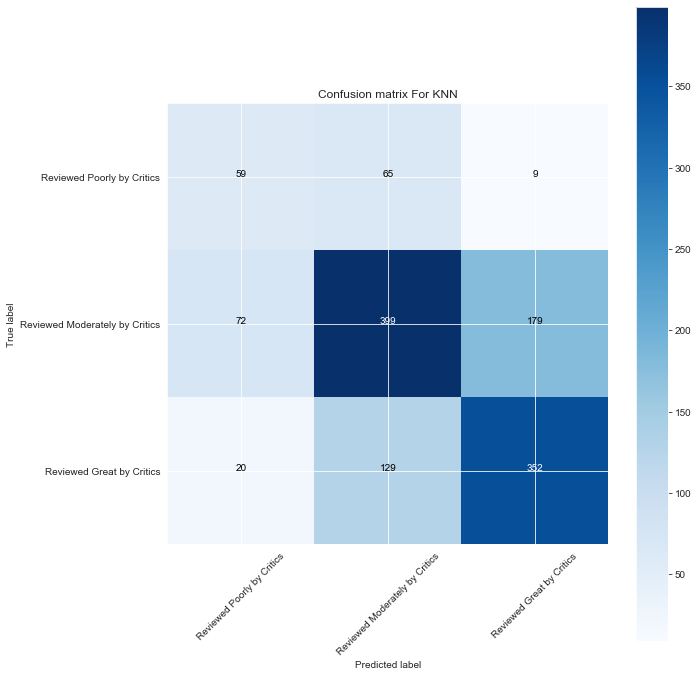

In [859]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm5, classes,
                          normalize=False,
                          title='Confusion matrix For KNN',
                          cmap=plt.cm.Blues,)

In [872]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_dt[0:25])
print(f'Accurary from 1st 25 values is {(13/25)*100}%')

True: [2 2 3 2 1 3 1 3 2 2 3 3 3 2 3 1 1 2 2 3 3 2 3 2 2]
Pred: [2 2 2 2 3 2 2 3 1 2 2 3 3 1 3 2 2 1 3 2 3 2 3 2 2]
Accurary from 1st 25 values is 52.0%


### Bernoulli NB Classifier

In [807]:
# Bernoulli NB Classifier

clf2= BernoulliNB()
clf2.fit(X2_train,y2_train)
y2_pred_clf = clf2.predict(X2_test)

clf_accuracy_train2 = clf2.score(X2_train ,y2_train)
clf_accuracy_test2 = clf2.score(X2_test,y2_test)


# Cross Validation - Logistic Regression

clf_cross_val_score2 = cross_val_score(clf2, X2,y2, cv=10)
clf_cv_score_avg2 = clf_cross_val_score2.mean()
cv_pred_clf2 = cross_val_predict(clf2, X2_test, y2_test, cv=10)
                                              
             
print(f'Bernoulli NB train accuracy is {clf_accuracy_train2}\nBernoulli NB test accuracy is {clf_accuracy_test2}\nMean Cross Validation Bernoulli NB is: {clf_cv_score_avg2}')

y_predict_proba_clf2 = clf2.predict_proba( X2_test)

Bernoulli NB train accuracy is 0.6062124248496994
Bernoulli NB test accuracy is 0.5771028037383178
Mean Cross Validation Bernoulli NB is: 0.5594180054045693


In [865]:
print(confusion_matrix(y2_test, y2_pred_clf))
print(classification_report(y2_test, y2_pred_clf))

[[ 12  97  24]
 [ 21 400 229]
 [  7 165 329]]
              precision    recall  f1-score   support

           1       0.30      0.09      0.14       133
           2       0.60      0.62      0.61       650
           3       0.57      0.66      0.61       501

    accuracy                           0.58      1284
   macro avg       0.49      0.45      0.45      1284
weighted avg       0.56      0.58      0.56      1284



In [866]:
cm6 = confusion_matrix(y2_test,y2_pred_clf)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

Confusion Matrix, without normalization
[[ 12  97  24]
 [ 21 400 229]
 [  7 165 329]]


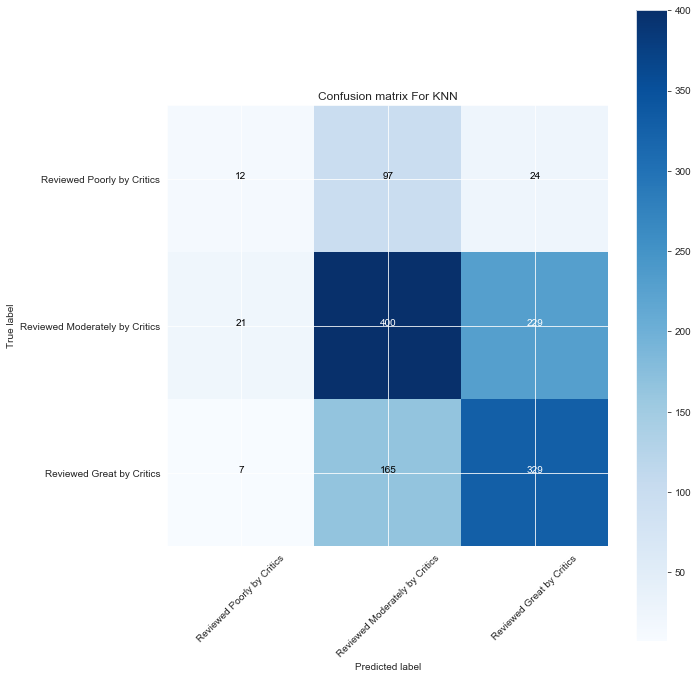

In [867]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm6, classes,
                          normalize=False,
                          title='Confusion matrix For KNN',
                          cmap=plt.cm.Blues,)

In [871]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_clf[0:25])
print(f'Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 2 3 2 1 3 1 3 2 2 3 3 3 2 3 1 1 2 2 3 3 2 3 2 2]
Pred: [2 2 3 3 2 2 3 3 2 2 3 3 3 2 3 2 3 2 2 2 2 3 3 2 3]
Accurary from 1st 25 values is 60.0%


###  Classifier

# Ploting the Predicted Values for each model